# **New York City Taxi and Limousine Data Analysis NYC Taxi Corp**
Data Period : January 2023

By : Glen Valencius

## **Latar Belakang**

New York City Taxi and Limousine atau biasa disebut NYC TLC, setiap bulannya merilis data pesanan yang bisa digunakan untuk dianalisa. Semua data yang ada didapatkan dari driver Taxi yang beroperasi didaerah New York.

Kita akan melakukan evaluasi peforma dari dataset yang sudah didapat

## **Pernyataan Masalah**

Dari data yang didapatkan kita diminta untuk melakukan evaluasi, yang dibagi menjadi 3 point:

1. Peforma Vendor (Menentukan apakah kerjasama kedepannya bisa berlanjut)
2. Mempelajari preferensi dari customer taxi NYC selama 1 bulan
3. Mengenali faktor-faktor yang mendorong pelanggan untuk menunjukkan apresiasi, seperti memberi tip.
4. Penghasilan tertinggi dalam 1 bulan


<hr>

# **DATA**

Sebelum kita dapat menjawab pertanyaan masalah, kita harus mempelajari terlebih dahulu data yang didapat.

Data yang didapat diambil dari : https://drive.google.com/drive/folders/1NYHIL-RgVPW-HONz4pdzlcbIChF-c37N

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=Warning)

pd.set_option('display.max_columns', None)
pd.options.display.max_rows = 200
# warnings.simplefilter(action='ignore')

from IPython.display import HTML

def side_by_side(*dfs):
    html = '<div style="display:flex">'
    for df in dfs:
        html += '<div style="margin-right: 2em">'
        html += df.to_html()
        html += '</div>'
    html += '</div>'
    display(HTML(html))

## Data Understanding

Sebelum kita memulai analisa, baiknya kita mengerti dahulu apa saja data yang tersedia di dalam data set, berikut adalah penjabarannya

In [2]:
df = pd.read_csv('/Users/glen/Library/Mobile Documents/com~apple~CloudDocs/01.Capstone/2.New York City TLC Trip Record/Data/NYC TLC Trip Record.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68211 entries, 0 to 68210
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorID               68211 non-null  int64  
 1   lpep_pickup_datetime   68211 non-null  object 
 2   lpep_dropoff_datetime  68211 non-null  object 
 3   store_and_fwd_flag     63887 non-null  object 
 4   RatecodeID             63887 non-null  float64
 5   PULocationID           68211 non-null  int64  
 6   DOLocationID           68211 non-null  int64  
 7   passenger_count        63887 non-null  float64
 8   trip_distance          68211 non-null  float64
 9   fare_amount            68211 non-null  float64
 10  extra                  68211 non-null  float64
 11  mta_tax                68211 non-null  float64
 12  tip_amount             68211 non-null  float64
 13  tolls_amount           68211 non-null  float64
 14  ehail_fee              0 non-null      float64
 15  im

In [4]:
display(df.describe(), df.describe(include='object'))

,VendorID,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
count,68211.000000,63887.000000,68211.000000,68211.000000,63887.000000,68211.000000,68211.000000,68211.000000,68211.000000,68211.000000,68211.000000,0.0,68211.000000,68211.000000,63887.000000,63877.000000,63887.000000
mean,1.863028,1.117160,98.549735,138.429901,1.315870,8.114852,16.603545,0.825431,0.588340,2.139012,0.169627,NaN,0.951625,21.789377,1.373613,1.021933,0.726748
std,0.343820,1.372913,61.244314,76.761311,0.979054,585.105955,13.470121,1.269904,0.385819,3.052710,1.099789,NaN,0.196875,15.457115,0.508039,0.146465,1.212836
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,-70.000000,-2.500000,-0.500000,-10.500000,0.000000,NaN,-1.000000,-71.500000,1.000000,1.000000,-2.750000
25%,2.000000,1.000000,74.000000,74.000000,1.000000,1.110000,9.300000,0.000000,0.500000,0.000000,0.000000,NaN,1.000000,12.900000,1.000000,1.000000,0.000000
50%,2.000000,1.000000,75.000000,138.000000,1.000000,1.850000,13.500000,0.000000,0.500000,1.600000,0.000000,NaN,1.000000,17.900000,1.000000,1.000000,0.000000
75%,2.000000,1.000000,129.000000,219.000000,1.000000,3.210000,19.800000,1.000000,0.500000,3.330000,0.000000,NaN,1.000000,26.150000,2.000000,1.000000,2.750000
max,2.000000,99.000000,265.000000,265.000000,9.000000,120098.840000,490.000000,12.500000,2.750000,222.220000,36.050000,NaN,1.000000,491.000000,5.000000,2.000000,2.750000


,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag
count,68211,68211,63887
unique,66575,66519,2
top,2023-01-09 09:08:00,2023-01-09 00:00:00,N
freq,4,6,63579


In [5]:
pd.set_option('display.max_colwidth', 3)
listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel1Desc

,Column Name,Number of Unique,Unique Sample
0,VendorID,2,"[2, 1]"
1,lpep_pickup_datetime,66575,"[2023-01-01 00:26:10, 2023-01-01 00:51:03, 2023-01-01 00:35:12, 2023-01-01 00:13:14, 2023-01-01 00:33:04, 2023-01-01 00:53:31, 2023-01-01 00:09:14, 2023-01-01 00:11:58, 2023-01-01 00:41:29, 2023-01-01 00:50:32, 2023-01-01 00:16:12, 2023-01-01 00:08:43, 2023-01-01 00:26:32, 2023-01-01 00:18:35, 2023-01-01 00:39:32, 2023-01-01 00:49:34, 2023-01-01 00:10:45, 2023-01-01 00:35:11, 2023-01-01 00:31:06, 2023-01-01 00:14:37, 2023-01-01 00:26:21, 2023-01-01 00:41:56, 2023-01-01 00:32:02, 2023-01-01 00:55:13, 2023-01-01 00:01:31, 2023-01-01 00:22:31, 2023-01-01 00:57:28, 2023-01-01 00:35:21, 2023-01-01 00:52:52, 2023-01-01 00:32:56, 2023-01-01 00:24:01, 2023-01-01 00:46:48, 2023-01-01 00:40:58, 2023-01-01 00:20:23, 2023-01-01 01:49:24, 2023-01-01 00:41:53, 2023-01-01 00:56:26, 2023-01-01 00:33:10, 2023-01-01 00:58:28, 2023-01-01 00:42:49, 2023-01-01 00:48:21, 2023-01-01 00:08:05, 2023-01-01 00:13:47, 2023-01-01 00:16:10, 2023-01-01 00:04:25, 2023-01-01 00:33:38, 2023-01-01 00:46:08, 2023-01-01 01:00:08, 2023-01-01 00:28:04, 2023-01-01 00:23:04, 2023-01-01 00:34:07, 2023-01-01 00:52:03, 2023-01-01 00:25:31, 2023-01-01 00:53:09, 2023-01-01 00:42:37, 2023-01-01 00:39:52, 2023-01-01 00:15:32, 2023-01-01 00:06:48, 2023-01-01 00:57:15, 2023-01-01 00:14:13, 2023-01-01 00:52:48, 2023-01-01 00:34:13, 2023-01-01 00:44:41, 2023-01-01 00:11:12, 2023-01-01 01:44:43, 2023-01-01 01:04:44, 2023-01-01 01:48:11, 2023-01-01 01:11:39, 2023-01-01 01:54:25, 2023-01-01 01:59:10, 2023-01-01 01:22:35, 2023-01-01 01:37:10, 2023-01-01 01:46:22, 2023-01-01 01:59:48, 2023-01-01 01:09:49, 2023-01-01 01:23:35, 2023-01-01 01:53:20, 2023-01-01 01:32:14, 2023-01-01 01:01:05, 2023-01-01 01:34:41, 2023-01-01 01:52:08, 2023-01-01 01:49:28, 2023-01-01 01:03:59, 2023-01-01 01:13:11, 2023-01-01 01:40:06, 2023-01-01 01:33:50, 2023-01-01 01:45:19, 2023-01-01 01:51:29, 2023-01-01 01:34:07, 2023-01-01 01:10:08, 2023-01-01 01:32:17, 2023-01-01 01:48:28, 2023-01-01 01:30:43, 2023-01-01 01:51:10, 2023-01-01 01:09:36, 2023-01-01 01:19:54, 2023-01-01 01:31:10, 2023-01-01 01:42:30, 2023-01-01 00:57:51, 2023-01-01 01:27:36, ...]"
2,lpep_dropoff_datetime,66519,"[2023-01-01 00:37:11, 2023-01-01 00:57:49, 2023-01-01 00:41:32, 2023-01-01 00:19:03, 2023-01-01 00:39:02, 2023-01-01 01:11:04, 2023-01-01 00:26:39, 2023-01-01 00:24:55, 2023-01-01 00:46:26, 2023-01-01 01:13:42, 2023-01-01 00:41:43, 2023-01-01 00:17:08, 2023-01-01 00:45:31, 2023-01-01 00:30:09, 2023-01-01 01:18:06, 2023-01-01 01:08:23, 2023-01-01 00:19:37, 2023-01-01 01:17:35, 2023-01-01 00:42:23, 2023-01-01 00:21:50, 2023-01-01 00:30:26, 2023-01-01 00:46:06, 2023-01-01 00:41:25, 2023-01-01 00:59:47, 2023-01-01 00:16:02, 2023-01-01 00:39:24, 2023-01-01 01:09:31, 2023-01-01 00:53:49, 2023-01-01 01:00:53, 2023-01-01 00:42:53, 2023-01-01 00:32:05, 2023-01-01 01:08:17, 2023-01-01 01:04:32, 2023-01-01 00:24:32, 2023-01-01 01:57:51, 2023-01-01 00:41:58, 2023-01-01 01:14:41, 2023-01-01 00:43:08, 2023-01-01 01:14:46, 2023-01-01 00:51:53, 2023-01-01 01:23:50, 2023-01-01 00:13:26, 2023-01-01 00:25:57, 2023-01-01 00:54:55, 2023-01-01 00:17:50, 2023-01-01 00:38:51, 2023-01-01 00:59:10, 2023-01-01 01:05:46, 2023-01-01 00:43:45, 2023-01-01 23:18:32, 2023-01-01 00:50:01, 2023-01-01 00:57:56, 2023-01-01 00:38:40, 2023-01-01 01:13:35, 2023-01-01 00:47:15, 2023-01-01 00:48:54, 2023-01-01 00:23:03, 2023-01-01 01:08:47, 2023-01-01 01:00:15, 2023-01-01 00:25:43, 2023-01-01 01:21:19, 2023-01-01 00:43:57, 2023-01-01 00:48:26, 2023-01-01 00:38:12, 2023-01-01 01:57:31, 2023-01-01 01:11:23, 2023-01-01 02:05:51, 2023-01-01 01:41:21, 2023-01-01 02:05:19, 2023-01-01 02:11:36, 2023-01-01 01:25:11, 2023-01-01 01:41:30, 2023-01-01 02:04:14, 2023-01-01 02:05:29, 2023-01-01 01:17:55, 2023-01-01 01:53:43, 2023-01-01 02:27:01, 2023-01-01 01:43:55, 2023-01-01 01:13:02, 2023-01-01 02:00:06, 2023-01-01 02:00:57, 2023-01-01 02:13:18, 2023-01-01 01:07:17, 2023-01-01 01:26:01, 2

In [6]:
df[df['tip_amount']<0]

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
3409,2,2023-01-03 11:43:10,2023-01-03 11:43:25,N,1.0,193,193,1.0,0.0,-3.0,0.0,-0.5,-0.90,0.0,NaN,-1.0,-5.40,3.0,1.0,0.0
7793,2,2023-01-05 12:33:18,2023-01-05 12:33:26,N,1.0,193,193,1.0,0.0,-3.0,0.0,-0.5,-0.90,0.0,NaN,-1.0,-5.40,3.0,1.0,0.0
8107,2,2023-01-05 15:23:14,2023-01-05 15:23:27,N,1.0,193,193,1.0,0.0,-3.0,0.0,-0.5,-0.01,0.0,NaN,-1.0,-4.51,3.0,1.0,0.0
10336,2,2023-01-06 14:54:21,2023-01-06 14:55:50,N,1.0,193,193,1.0,0.0,-3.7,0.0,-0.5,-0.13,0.0,NaN,-1.0,-5.33,3.0,1.0,0.0
14707,2,2023-01-08 16:49:17,2023-01-08 16:49:20,N,1.0,61,61,1.0,0.0,-3.0,0.0,-0.5,-10.50,0.0,NaN,-1.0,-15.00,4.0,1.0,0.0
18003,2,2023-01-10 11:30:17,2023-01-10 11:32:09,N,1.0,193,193,1.0,0.0,-3.7,0.0,-0.5,-0.01,0.0,NaN,-1.0,-5.21,3.0,1.0,0.0
30874,2,2023-01-16 14:03:29,2023-01-16 14:03:56,N,1.0,193,193,1.0,0.0,-3.0,0.0,-0.5,-0.90,0.0,NaN,-1.0,-5.40,3.0,1.0,0.0
37071,2,2023-01-19 14:27:07,2023-01-19 14:27:29,N,1.0,193,193,1.0,0.0,-3.0,0.0,-0.5,-0.90,0.0,NaN,-1.0,-5.40,3.0,1.0,0.0
56495,2,2023-01-28 09:33:22,2023-01-28 09:34:00,N,1.0,193,193,2.0,0.0,-3.0,0.0,-0.5,-0.90,0.0,NaN,-1.0,-5.40,3.0,1.0,0.0


Secara umum, kita bisa melihat bahwa:
* dataset NYC TLC memiliki 68211 row dan 19 kolom
* data di kolom `lpep_pickup_datetime` & `lpep_dropoff_datetime` masih berbentuk object dan harus diubah menjadi datetime
* Data dapat dibagi menjadi beberapa tipe
<br> <br>

| **Data Type** | **Column** |
| :-- | :-- |
| Kuantitaif Continuous | `Lpep_pickup_datetime`, `Lpep_dropoff_datetime`, `Trip_distance`, `Fare_amount`, `Tip_amount`, `Tolls_amount`, `Ehail_fee`, `Improvement_surcharge`, `total_amount` |
| Kuantitatif Discrete | `passenger_count` |
| Kualitatif Nominal | `VendorID`, `store_and_fwd_flag`, `RatecodeID`, `PULocationID`, `DOLocationID`, `extra`, `mta_tax`, `payment_type`, `trip_type`, `congestion_surcharge` |

* Data di kolom fare_amount, extra, mta_tax, tip_amount, improvement surcharge, dan improvement_surcharge memiliki nilai negatif yang tidak normal. Kemungkinan ada kesalahan sistem merecord menjadi negatif
* ehail_fee merupakan kolom untuk biaya taxi online seperti lyft dan Uber, dengan domain knowledge yang didapat data yang akan digunakan ini hanya untuk Taxi Convensional Yellow Cab dan Green Cab
* Diasumsikan Kolom `Lpep_pickup_datetime`, `Lpep_dropoff_datetime`, `Trip_distance` digenerate otomatis oleh sistem dan tidak bisa diubah oleh driver
* Diasumsikan kolom `passenger_count` diisi manual oleh driver


In [7]:
x = df.isna().sum()/df.shape[0]*100
y = df.isna().sum()
pd.DataFrame({
    'Jumlah Row NaN' : y,
    'Percentase': x})

,Jumlah Row NaN,Percentase
VendorID,0,0.000000
lpep_pickup_datetime,0,0.000000
lpep_dropoff_datetime,0,0.000000
store_and_fwd_flag,4324,6.339154
RatecodeID,4324,6.339154
PULocationID,0,0.000000
DOLocationID,0,0.000000
passenger_count,4324,6.339154
trip_distance,0,0.000000
fare_amount,0,0.000000


### Checking Missing Value

Di sini kita mengecek apakah missing value di kolom - kolom ada yang berbeda atau semua di row yang sama di kolom `store_and_fwd_flag`,`RatecodeID`,`passenger_count`,`payment_type`,`trip_type`,`congestion_surcharge`

<Axes: title={'center': 'Heatmap of NaN Values'}>

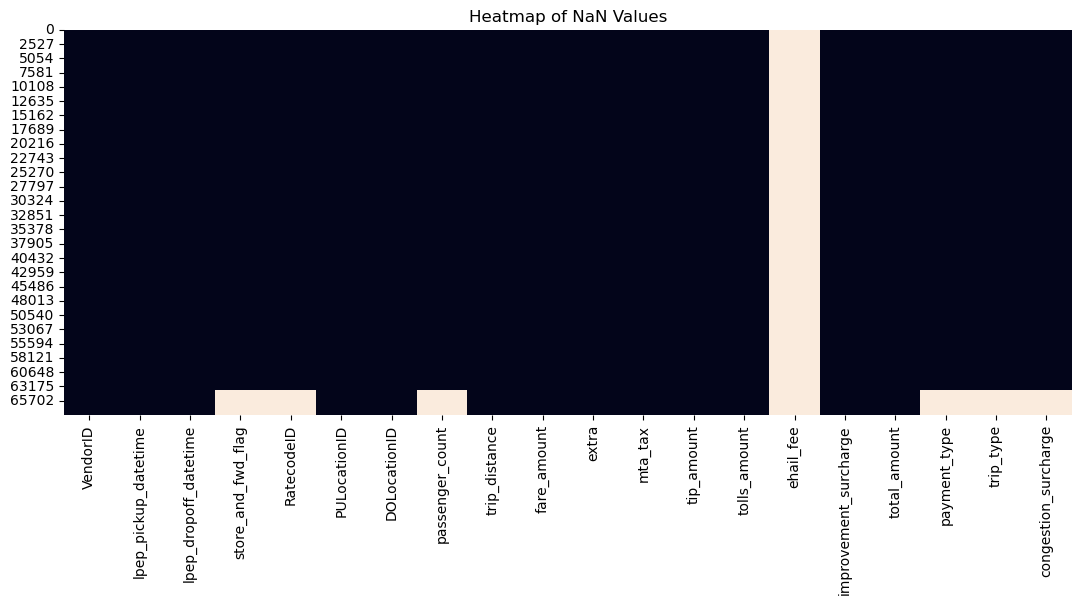

In [8]:
#Sebaran Missing Value/NaN dalam dataset
plt.figure(figsize=(13,5))
plt.title('Heatmap of NaN Values')
sns.heatmap(df[df.columns].isna(),cbar=False)

Secara garis besar kita bisa melihat missing value di kategori `store_and_fwd_flag`,`RatecodeID`,`passenger_count`,`ehail_fee`,`payment_type`,`trip_type`,`congestion_surcharge`

Kolom ehail_free memiliki 100% missing value, karena data yang akan digunakan tidak terdapat data dari online taxi dan tidak relevan dengan analisa makan akan didrop

Untuk kolom sisanya akan dilakukan pengecekan apakah row yang memiliki missing value sama atau berbeda

### Drop Kolom ehail_fee

In [9]:
df.drop(columns='ehail_fee',inplace=True)

In [10]:
columns_to_check = ['store_and_fwd_flag', 'RatecodeID', 'passenger_count', 'payment_type','trip_type' ,'congestion_surcharge']

# Create a list of Boolean Series indicating where NaNs are
nan_masks = [df[col].isna() for col in columns_to_check]

# Loop through each row and check if the NaNs align
misaligned_rows = []

for index, row in df.iterrows():
    # Check if NaNs align across all columns for the current row
    row_alignment = [mask.iloc[index] for mask in nan_masks]
    
    if len(set(row_alignment)) > 1:  # If there's more than one unique value (True or False)
        misaligned_rows.append(index)

# Output the result: misaligned rows (if any)
print("Row dengan Missing Value berbeda:", misaligned_rows, "Total line ada:",len(misaligned_rows))

Row dengan Missing Value berbeda: [1084, 2174, 9055, 14125, 29143, 29711, 35975, 37691, 42432, 45204] Total line ada: 10


Setelah dicek ternyata ada row yang memiliki missing value hanya di trip_typenya saja

dengan demikian kita tidak bisa langsung mendrop row yang memilik missing value

**Kesimpulan**

Untuk data yang missing value, memiliki jumlah yang berbeda beda

Dibutuhkan pengecekan lebih dalam lagi mana saja yang bisa kita isi dan tidak

Selanjutnya kita akan memulai untuk melakukan label data mana saja yang bisa disebut Abnormal, tujuannya untuk mengecek lebih dalam apakah ada data abnormal selain di data yang missing value

## Label Data with abnormal Data

Untuk kebutuhan akurasi data, saya membuat label baru yang bisa menunjukan data di row berapa saja yang memiliki NaN dan juga error logic. Ini akan mempermudah untuk menghitung peforma masing - masing vendor

Karena itu data row yang abnormal akan dihitung dulu di akhir dan dipisahkan ke dataframe sendiri, baru akan dilakukan cleaning dari row yang dilabel abnormal

Pada

status = Normal / Abnormal<br>
deadheading = Yes / No (Deadheading adalah taxi yang hanya berpindah posisi tanpa mengangkut customer, biasanya terekam karena error di mesin)

In [11]:
#Membuat tabel baru
df['status'] = 'Normal'
df['deadheading'] = 'No'

In [12]:
df

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,status,deadheading
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.90,1.0,0.5,4.03,0.0,1.0,24.18,1.0,1.0,2.75,Normal,No
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.70,1.0,0.5,2.64,0.0,1.0,15.84,1.0,1.0,0.00,Normal,No
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.20,1.0,0.5,1.94,0.0,1.0,11.64,1.0,1.0,0.00,Normal,No
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.50,0.5,1.5,1.70,0.0,1.0,10.20,1.0,1.0,0.00,Normal,No
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.00,0.5,1.5,0.00,0.0,1.0,8.00,1.0,1.0,0.00,Normal,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68206,2,2023-01-31 22:29:00,2023-01-31 22:42:00,NaN,NaN,49,62,NaN,4070.82,15.70,0.0,0.0,0.00,0.0,1.0,16.70,NaN,NaN,NaN,Normal,No
68207,2,2023-01-31 22:40:00,2023-01-31 22:48:00,NaN,NaN,10,205,NaN,2.14,4.41,0.0,0.0,0.00,0.0,1.0,5.41,NaN,NaN,NaN,Normal,No
68208,2,2023-01-31 23:46:00,2023-02-01 00:02:00,NaN,NaN,66,37,NaN,3.44,16.53,0.0,0.0,3.51,0.0,1.0,21.04,NaN,NaN,NaN,Normal,No
68209,2,2023-01-31 23:01:00,2023-01-31 23:19:00,NaN,NaN,225,189,NaN,3.03,14.98,0.0,0.0,3.20,0.0,1.0,19.18,NaN,NaN,NaN,Normal,No


In [13]:
# Fungsi untuk mempermudah labeling
def abnormalconvert(y):
    df.loc[y.index,'status']='Abnormal'
    print(f'Total line yang dikonversi ada = {len(y)}')
    print(f'Total data yang abnormal {len(df[df['status']=='Abnormal'])}')

### **time_on_road**

untuk mengecek abnormal data di 2 kolom `lpep_pickup_datetime` & `lpep_dropoff_datetime` kita membutuhkan kolom baru yang menunjukan lama di jalan

sebelumnya kita harus mengubah format menjadi date and time

In [14]:
# Mengubah format dataframe menjadi tanggal
df['lpep_pickup_datetime']= df['lpep_pickup_datetime'].astype('datetime64[ns]')
df['lpep_dropoff_datetime']= df['lpep_dropoff_datetime'].astype('datetime64[ns]')

In [15]:
# Menambahkan kolom tome on road
df['time_on_road'] = df['lpep_dropoff_datetime']-df['lpep_pickup_datetime']
df['time_on_road'] = round(df['time_on_road'].dt.total_seconds() / 60,2) #mengubah timedelta ke satuan menit

<Axes: xlabel='time_on_road'>

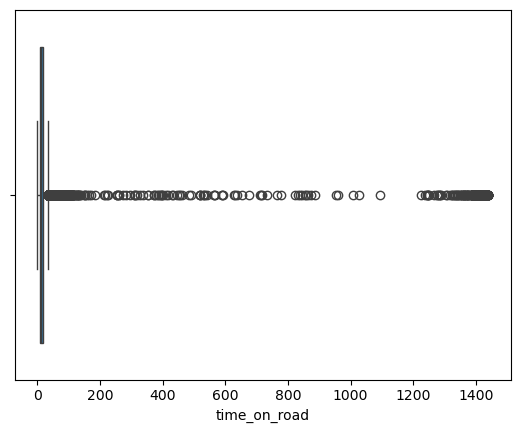

In [16]:
sns.boxplot(x=df['time_on_road'])

Dengan melakukan research saya mendapatkan bahwa Taxi Driver tidak boleh mengangkut penumpang lebih dari 10 jam

Oleh karena itu tidak memungkinkan satu perjalanan lebih dari 10 jam / 600 menit

untuk perjalanan di bawah 4 menit juga akan dilabelkan sebagai Abnormal, karena melihat kota New York yang cukup padat

In [17]:
# Trip with time below 4 min
a = df[((df['time_on_road']<4)|(df['time_on_road']>600))&(df['status']!='Abnormal')]
abnormalconvert(a)

Total line yang dikonversi ada = 5620
Total data yang abnormal 5620


<Axes: xlabel='time_on_road'>

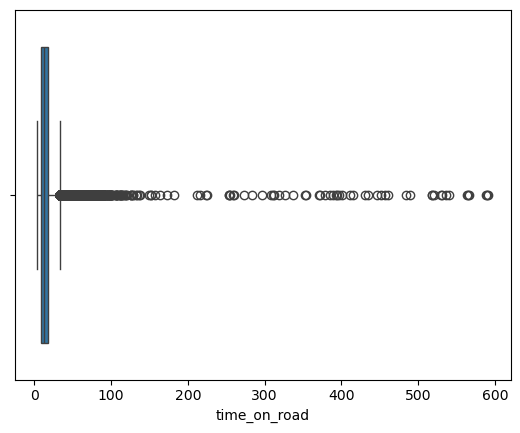

In [18]:
sns.boxplot(x=df[df['status']!='Abnormal']['time_on_road'])

### **speed**

untuk menghitung kecepatan rata - rata taxi, kita bisa menghitung dari `trip_distance` / `time_on_road`

Menurut hasil research, kecepatan maksimal dari taxi adalah 25 mph

Khusus untuk taxi yang menggunakan toll bisa max 45 mph

In [19]:
df['speed'] = round(df['trip_distance']/(df['time_on_road']/60),2)

<Axes: xlabel='speed'>

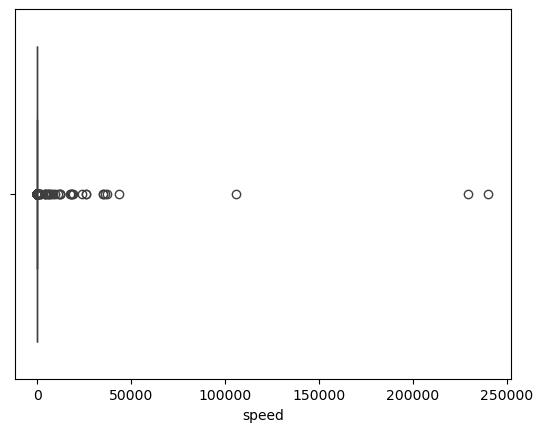

In [20]:
sns.boxplot(x=df[df['status']!='Abnormal']['speed'])

In [21]:
#Taxi dengan kecepatan di atas 25 atau 0 yang tanpa menggunakan toll
a = df[((df['speed']>25)|(df['speed']==0))&(df['tolls_amount']==0)&(df['status']!='Abnormal')]
abnormalconvert(a)

Total line yang dikonversi ada = 3362
Total data yang abnormal 8982


In [22]:
#taxi di atas 50mph menggunakan toll
a = df[((df['speed']>50))&(df['tolls_amount']>0)&(df['status']!='Abnormal')]
abnormalconvert(a)

Total line yang dikonversi ada = 4
Total data yang abnormal 8986


<Axes: xlabel='speed'>

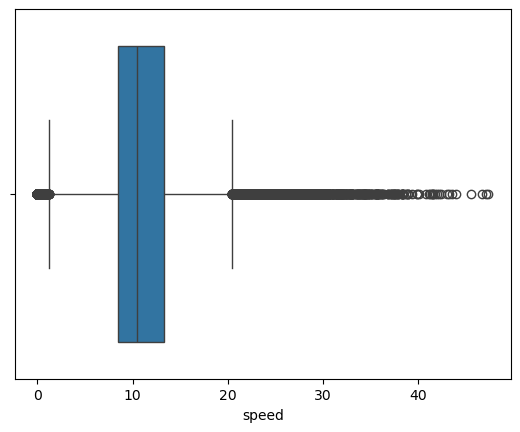

In [23]:
sns.boxplot(x=df[df['status']!='Abnormal']['speed'])

### **RatecodeID**

jika melihat value dari Ratecode kita memiliki RatecodeID
* 1 = Standard rate
* 2 =JFK
* 3 =Newark
* 4 =Nassau or Westchester
* 5 =Negotiated fare
* 6 =Group ride

Selain itu bisa dibilang data Abnormal

In [24]:
df['RatecodeID'].unique()

array([ 1.,  5.,  4.,  3.,  2., 99., nan])

In [25]:
#melabelkan ratecode yg 99 dan ratecode NaN
y = df[((df['RatecodeID']==99)|(df['RatecodeID'].isna()))&
   (df['status']!='Abnormal')]
abnormalconvert(y)

Total line yang dikonversi ada = 3963
Total data yang abnormal 12949


In [26]:
df[df['status']!='Abnormal']['RatecodeID'].unique()

array([1., 5., 3., 2., 4.])

### **PU dan DOLocationID**

Kita akan mencari lokasi PU dan DO yang berisi 264, setelah melakukan research LocationID hanya hingga 1-263 selain itu tidak ada atau diluar kota New York

Kedua kita akan mencari deadheading dengan kriteria passenger 0 atau NaN, trip distance 0 atau sangat kecil, dan PU dan DO location sama


In [27]:
a = df[((df['PULocationID']==264)|(df['PULocationID'].isna()))&(df['status']!='Abnormal')]
abnormalconvert(a)

Total line yang dikonversi ada = 13
Total data yang abnormal 12962


In [28]:
#passenger 0 atau NaN, trip distance 0 atau kecil, PU dan DO location sama
b = df[(df['PULocationID']==df['DOLocationID'])&(df['trip_distance']<=0)]
df.loc[b.index,'deadheading']='True'
abnormalconvert(b)

Total line yang dikonversi ada = 1284
Total data yang abnormal 12963


In [29]:
#trip distance 0
b = df[(df['status']!='Abnormal')&(df['trip_distance']==0)]
df.loc[b.index,'deadheading']='True'
abnormalconvert(b)

Total line yang dikonversi ada = 192
Total data yang abnormal 13155


### **store_and_fwd_flag**

Kita akan melabelkan store and fwd yang NaN, setelah dicek sudah terlabel semua dengan Abnormal

In [30]:
df[df['store_and_fwd_flag'].isna()]['status'].unique()

array(['Abnormal'], dtype=object)

### **passenger_count**

Dengan melakukan research didapatkan bahwa di data ini terdapat 3 jenis taxi yang bisa dilihat dari `congestion_surcharge`

max taxi cab biasa adalah 4

2.5 / 0 = taxi cab 

2.75  = limousin/green cab

NaN = Unknown

In [31]:
#mobil taxicab biasa tapi passenger lebih dari 5
df[(df['passenger_count']>4) & (df['congestion_surcharge']==2.5) ]

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,status,deadheading,time_on_road,speed


In [32]:
df[(df['passenger_count'].isna())&(df['status']!='Abnormal')]
#Semua data passanger yg abnormal sudah dilabelkan

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,status,deadheading,time_on_road,speed


Setelah dicek data sudah dilabelkan semua dengan Abnormal

### **trip_distance**

bila melihat yang sudah difilter terlihat sudah wajar

<Axes: xlabel='trip_distance'>

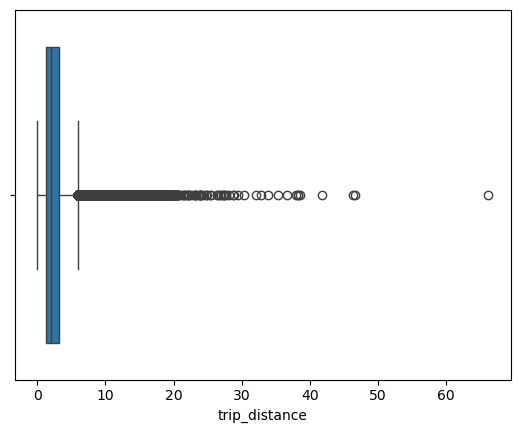

In [33]:
sns.boxplot(x=df[df['status']!='Abnormal']['trip_distance'])

### **fare_amount**

mencari fare amount kecil tetapi waktu yang panjang dan jarak yang jauh

untuk mencari abnormal kita akan menambahkan kolom baru perhitungan kasar dari base fare dengan rumus

fare amount = 2.5 + 2.5/miles + 0.5 perminute

semua row dengan range error 10 dollar akan dianggap sebagai outlier

<Axes: xlabel='fare_amount'>

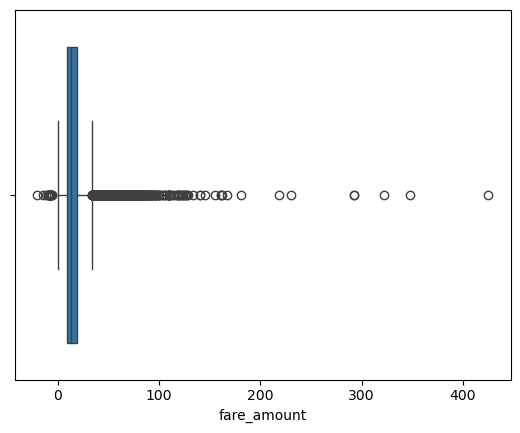

In [34]:
sns.boxplot(x=df[df['status']!='Abnormal']['fare_amount'])

In [35]:
df['expected_fare'] = 2.5+df['trip_distance']*2.5+0.5*df['time_on_road']

In [36]:
#fare amount yang jauh dari expected fare
a= df[((df['fare_amount'] < (df['expected_fare'] - 10))) | (df['fare_amount'] > (df['expected_fare'] + 10))&(df['status']!='Abnormal')]
abnormalconvert(a)

Total line yang dikonversi ada = 917
Total data yang abnormal 13631


<Axes: xlabel='fare_amount'>

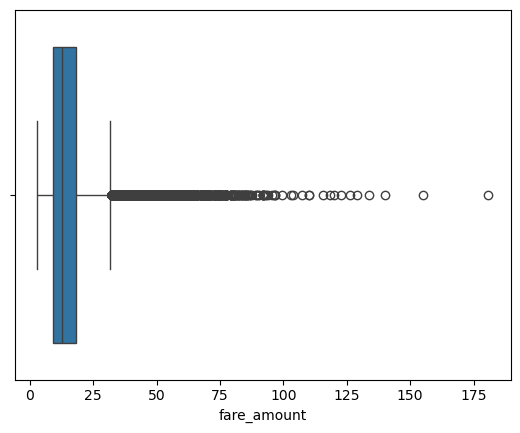

In [37]:
sns.boxplot(x=df[df['status']!='Abnormal']['fare_amount'])

### **tip_amount**

tip biasanya sekitar 20% tetapi memungkinkan lebih tinggi lagi

untuk menghitung ini kita bisa menggunakan kalkulasi tip_amount / fare_amount *100

Tip dengan percent lebih dari 100 akan dianggap tidak wajar

In [38]:
df['percent_tip'] = round(df['tip_amount']/df['fare_amount']*100,2)

<Axes: ylabel='percent_tip'>

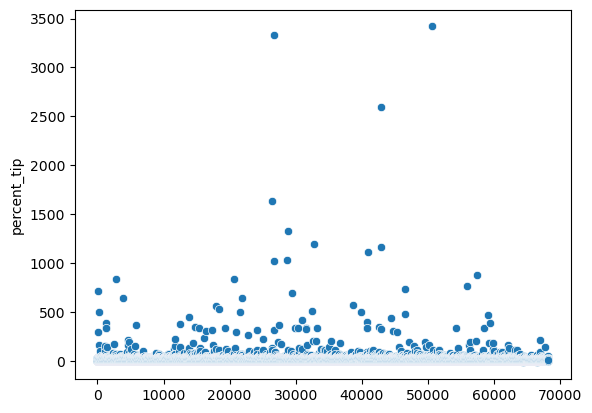

In [39]:
sns.scatterplot(df['percent_tip'])

In [40]:
a = df[(df['percent_tip']>100)&(df['status']!='Abnormal')]
abnormalconvert(a)

Total line yang dikonversi ada = 48
Total data yang abnormal 13679


<Axes: ylabel='percent_tip'>

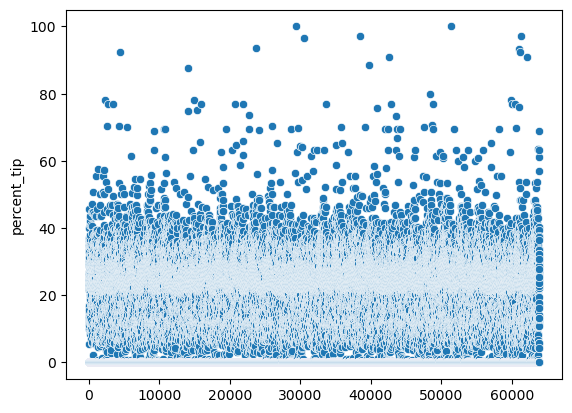

In [41]:
sns.scatterplot(df[df['status']!='Abnormal']['percent_tip'])

<Axes: xlabel='tip_amount', ylabel='Count'>

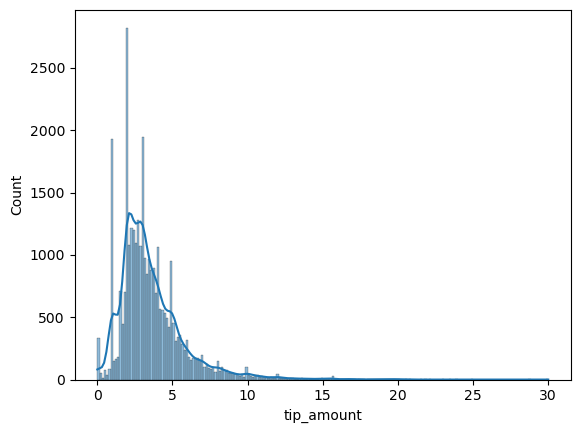

In [42]:
sns.histplot(df[(df['status']!='Abnormal')&(df['tip_amount']>0)]['tip_amount'],kde=True)

### **extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, payment_type, trip_type, congestion_surcharge**

Untuk label extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, payment_type, trip_type, congestion_surcharge sudah dilabelkan semua

In [43]:
x = [df[(df['extra']<0)&(df['status']!='Abnormal')].shape[0],
df[(df['mta_tax']<0)&(df['status']!='Abnormal')].shape[0],
df[(df['tolls_amount'].isna())&(df['status']!='Abnormal')].shape[0],
df[(df['improvement_surcharge']<0)&(df['status']!='Abnormal')].shape[0],
df[(df['total_amount']<0)&(df['status']!='Abnormal')].shape[0],
df[(df['payment_type'].isna())&(df['status']!='Abnormal')].shape[0],
df[(df['trip_type'].isna())&(df['status']!='Abnormal')].shape[0],
df[(df['congestion_surcharge'].isna())&(df['status']!='Abnormal')].shape[0]
]
if sum(x) == 0 :
    print('Semua data abnormal di kolom sudah dilabel semua')
else:
    print('Terdapat kolom dengan abnormal yang masih belum dilabel')


Semua data abnormal di kolom sudah dilabel semua


### **Menghitung Error Rate setiap Vendor**

Setelah melakukan Labeling setiap data kita bisa menghitung error setiap vendor

Text(0.5, 0, 'Row of Data')

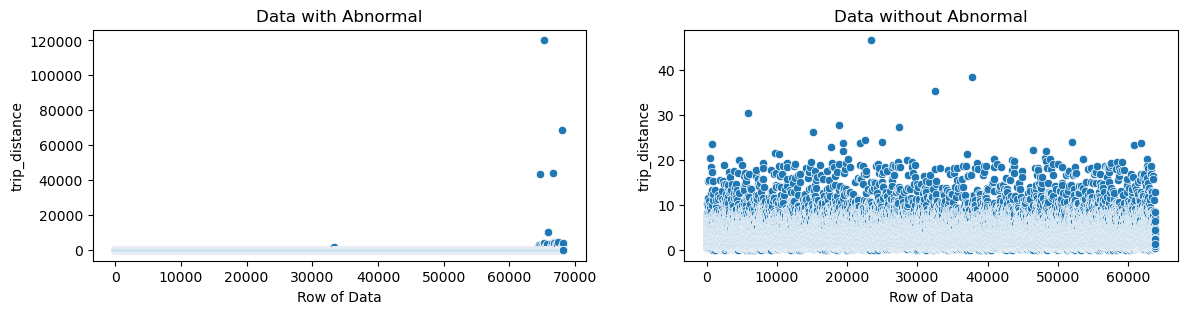

In [44]:
fig, ax = plt.subplots(1, 2, figsize=(14, 3))  # 1 row, 2 columns

sns.scatterplot(df['trip_distance'],ax=ax[0])
ax[0].set_title('Data with Abnormal')
ax[0].set_xlabel('Row of Data')


sns.scatterplot(df[df['status']=='Normal']['trip_distance'])
ax[1].set_title('Data without Abnormal')
ax[1].set_xlabel('Row of Data')


Text(0.5, 0, 'Row of Data')

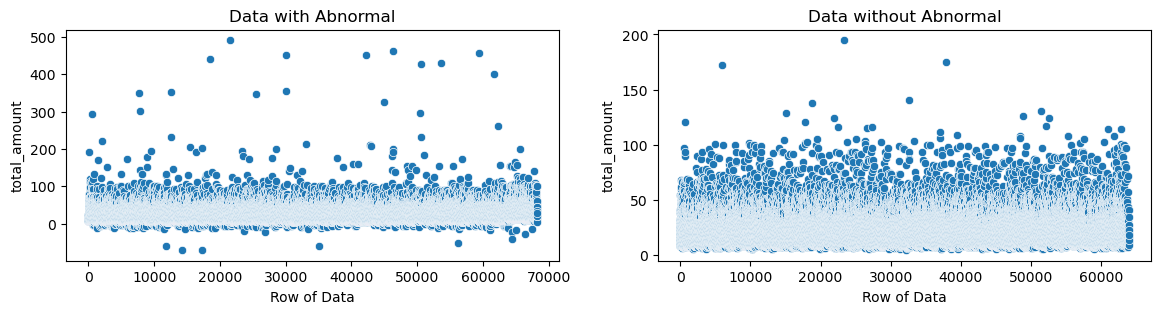

In [45]:
fig, ax = plt.subplots(1, 2, figsize=(14, 3))  # 1 row, 2 columns

sns.scatterplot(df['total_amount'],ax=ax[0])
ax[0].set_title('Data with Abnormal')
ax[0].set_xlabel('Row of Data')


sns.scatterplot(df[df['status']=='Normal']['total_amount'])
ax[1].set_title('Data without Abnormal')
ax[1].set_xlabel('Row of Data')

#data yang dibawah 0 sudah tidak ada

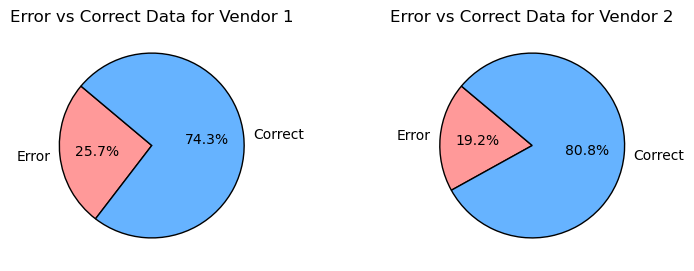

In [46]:
errorVendor1 = df[(df['status']=='Abnormal')&(df['VendorID']==1)].shape[0]
errorVendor2 = df[(df['status']=='Abnormal')&(df['VendorID']==2)].shape[0]
totalDataVendor1 = df[df['VendorID']==1].shape[0]
totalDataVendor2 = df[df['VendorID']==2].shape[0]

percentageerrorVendor1 = errorVendor1/totalDataVendor1*100

percentageerrorVendor2 = errorVendor2/totalDataVendor2*100
# Create the pie chart
fig, ax = plt.subplots(1,2,figsize=(9, 3))

correctPercentage1 = 100 - percentageerrorVendor1
labels1 = ['Error', 'Correct']
sizes1 = [percentageerrorVendor1, correctPercentage1]
colors = ['#ff9999', '#66b3ff']
ax[0].pie(sizes1, labels=labels1, colors=colors, autopct='%1.1f%%', startangle=140, wedgeprops={'edgecolor': 'black'})
ax[0].set_title(f"Error vs Correct Data for Vendor 1")

correctPercentage2 = 100 - percentageerrorVendor2
labels2 = ['Error', 'Correct']
sizes2 = [percentageerrorVendor2, correctPercentage2]
colors = ['#ff9999', '#66b3ff']
ax[1].pie(sizes2, labels=labels2, colors=colors, autopct='%1.1f%%', startangle=140, wedgeprops={'edgecolor': 'black'})
ax[1].set_title(f"Error vs Correct Data for Vendor 2")

# ax[0].axis('equal')


# Show the plot
plt.show()


Text(0.5, 1.0, 'Error vs Correct Data')

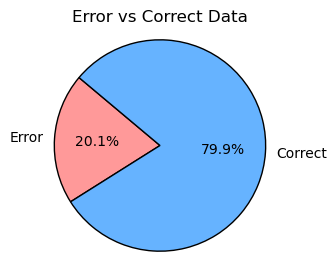

In [47]:
fig, ax = plt.subplots(figsize=(3, 3))
labels = ['Error', 'Correct']
sizes1 = [df[(df['status']=='Abnormal')].shape[0]/df.shape[0]*100, 100-df[(df['status']=='Abnormal')].shape[0]/df.shape[0]*100]
colors = ['#ff9999', '#66b3ff']
ax.pie(sizes1, labels=labels1, colors=colors, autopct='%1.1f%%', startangle=140, wedgeprops={'edgecolor': 'black'})
ax.axis('equal')
ax.set_title(f"Error vs Correct Data")

In [48]:
print(f'''Kesimpulan:
Dengan melihat jumlah data error di setiap vendor, berikut hasil setiap Vendor
    Vendor 1 : {round(percentageerrorVendor1)}%
    Vendor 2 : {round(percentageerrorVendor2)}%

Dengan demikian bisa diambil kesimpulan bahwa Vendor 1 meiliki jumlah Error lebih banyak

Insight:
Perusahaan bisa mereview kembali SLA dengan setiap Vendor, bila tetap mempertahankan dengan error setinggi ini dapat sangat mempengaruhi pendapatan perusahaan dan juga akurasi data.
''')

Kesimpulan:
Dengan melihat jumlah data error di setiap vendor, berikut hasil setiap Vendor
    Vendor 1 : 26%
    Vendor 2 : 19%

Dengan demikian bisa diambil kesimpulan bahwa Vendor 1 meiliki jumlah Error lebih banyak

Insight:
Perusahaan bisa mereview kembali SLA dengan setiap Vendor, bila tetap mempertahankan dengan error setinggi ini dapat sangat mempengaruhi pendapatan perusahaan dan juga akurasi data.



In [49]:
data_with_data_status = df.copy
# data_with_data_status.to_excel('/Users/glen/Library/Mobile Documents/com~apple~CloudDocs/01.Capstone/2.New York City TLC Trip Record/Export Dataset/data_with_data_status.xlsx')

<hr>

## Data Cleaning

dengan data abnormal 20.1% maka di sini akan mencoba untuk mengisi fill nan

### Drop deadheading Data

In [50]:
#Drop deadheading
print(f'Total yang di drop adalah {len(df[df['deadheading']=='True'].index)}')
df.drop(df[df['deadheading']=='True'].index,inplace=True)

Total yang di drop adalah 1476


### Dropping Kolom 

Drop store_and_fwd_flag, extra, mta_tax, tolls amount, improvement surcharge , congestion_surcharge(drop diakhir digunakan untuk mengubah jadi tipe mobil)

In [51]:
df.drop(columns=['store_and_fwd_flag','extra','mta_tax','improvement_surcharge'],inplace=True)
df

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount,total_amount,payment_type,trip_type,congestion_surcharge,status,deadheading,time_on_road,speed,expected_fare,percent_tip
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,1.0,166,143,1.0,2.58,14.90,4.03,0.0,24.18,1.0,1.0,2.75,Normal,No,11.02,14.05,14.460,27.05
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,1.0,24,43,1.0,1.81,10.70,2.64,0.0,15.84,1.0,1.0,0.00,Normal,No,6.77,16.04,10.410,24.67
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,1.0,223,179,1.0,0.00,7.20,1.94,0.0,11.64,1.0,1.0,0.00,Abnormal,No,6.33,0.00,5.665,26.94
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,1.0,41,238,1.0,1.30,6.50,1.70,0.0,10.20,1.0,1.0,0.00,Normal,No,5.82,13.40,8.660,26.15
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,1.0,41,74,1.0,1.10,6.00,0.00,0.0,8.00,1.0,1.0,0.00,Normal,No,5.97,11.06,8.235,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68206,2,2023-01-31 22:29:00,2023-01-31 22:42:00,NaN,49,62,NaN,4070.82,15.70,0.00,0.0,16.70,NaN,NaN,NaN,Abnormal,No,13.00,18788.40,10186.050,0.00
68207,2,2023-01-31 22:40:00,2023-01-31 22:48:00,NaN,10,205,NaN,2.14,4.41,0.00,0.0,5.41,NaN,NaN,NaN,Abnormal,No,8.00,16.05,11.850,0.00
68208,2,2023-01-31 23:46:00,2023-02-01 00:02:00,NaN,66,37,NaN,3.44,16.53,3.51,0.0,21.04,NaN,NaN,NaN,Abnormal,No,16.00,12.90,19.100,21.23
68209,2,2023-01-31 23:01:00,2023-01-31 23:19:00,NaN,225,189,NaN,3.03,14.98,3.20,0.0,19.18,NaN,NaN,NaN,Abnormal,No,18.00,10.10,19.075,21.36


### Fill NaN

#### RateCode

Untuk mengisi RatecodeID saya mereffer ke DO dan PU Location
| **RatecodeID** | **Meaning** | **PU/DOLocationID** |
| --- | --- | --- |
|1 | Standard rate | | 
|2 | JFK | 132 |
| 3 | Newark | 1 |
| 4 | Nassau or Westchester | 250 |
| 5 | Negotiated fare |
| 6 | Group ride |

Bila selain dari PU/DOLocationID diatas, bisa dilihat dari Modus akan diisi dengan 1 / Standard Rate

In [52]:
#mengisi rate code yang bisa
df['RatecodeID'] = np.where(
    (df['RatecodeID'].isna()) & ((df['PULocationID'] == 132) | (df['DOLocationID'] == 132)), 2,
    np.where(
        (df['RatecodeID'].isna()) & ((df['PULocationID'] == 1) | (df['DOLocationID'] == 1)), 3,
        np.where(
            (df['RatecodeID'].isna()) & ((df['PULocationID'] == 250) | (df['DOLocationID'] == 250)), 4,
            df['RatecodeID']
        )
    )
)

In [53]:
df.groupby('RatecodeID')['RatecodeID'].count()/df.shape[0]*100

RatecodeID
1.0     91.560650
2.0     0.358133 
3.0     0.037462 
4.0     0.088409 
5.0     1.663295 
99.0    0.014985 
Name: RatecodeID, dtype: float64

untuk mengisi sisa Ratecode the central tendency, yaitu modus, bila dilihat data yang paling banyak adalah ratecode 1, sehingga bia mengisi dengan spefisik nilai lain tidak akan berpengaruh signifikan

untuk ratecode 99 juga akan diubah menjadi 1

In [54]:
df['RatecodeID'].fillna(1,inplace=True)
df.loc[df['RatecodeID']==99,'RatecodeID']=1

In [55]:
df.isna().sum()

VendorID                  0  
lpep_pickup_datetime      0  
lpep_dropoff_datetime     0  
RatecodeID                0  
PULocationID              0  
DOLocationID              0  
passenger_count          4304
trip_distance             0  
fare_amount               0  
tip_amount                0  
tolls_amount              0  
total_amount              0  
payment_type             4304
trip_type                4314
congestion_surcharge     4304
status                    0  
deadheading               0  
time_on_road              0  
speed                    39  
expected_fare             0  
percent_tip              27  
dtype: int64

#### Passenger count

karena median dari passenger adalah 1 dan hampir 80% maka bisa disimpulkan bahwa untuk mengisi nan passanger bisa menggunakan 1

dan untuk passenger dengan 0, bisa diisi juga 1 untuk minimal taxi bisa beroperasi

In [56]:
df.groupby('passenger_count')[['passenger_count']].count()/df.shape[0]*100

,passenger_count
passenger_count,
0.0,0.455533
1.0,79.484528
2.0,7.457856
3.0,1.402562
4.0,0.539447
5.0,2.634300
6.0,1.570390
7.0,0.004495
8.0,0.001498


In [57]:
df.loc[df['passenger_count']==0,'passenger_count']=1

In [58]:
df['passenger_count'].fillna(1,inplace=True)

In [59]:
df.isna().sum()

VendorID                  0  
lpep_pickup_datetime      0  
lpep_dropoff_datetime     0  
RatecodeID                0  
PULocationID              0  
DOLocationID              0  
passenger_count           0  
trip_distance             0  
fare_amount               0  
tip_amount                0  
tolls_amount              0  
total_amount              0  
payment_type             4304
trip_type                4314
congestion_surcharge     4304
status                    0  
deadheading               0  
time_on_road              0  
speed                    39  
expected_fare             0  
percent_tip              27  
dtype: int64

#### payment_type

untuk mengisi type of payment bisa melihat dari kolom tip, jika kolom tip terisi, ada kemungkinan bahwa payment type yang digunakan adalah cc atau 1

Text(0.5, 1.0, 'Perbandingan jumlah data payment type')

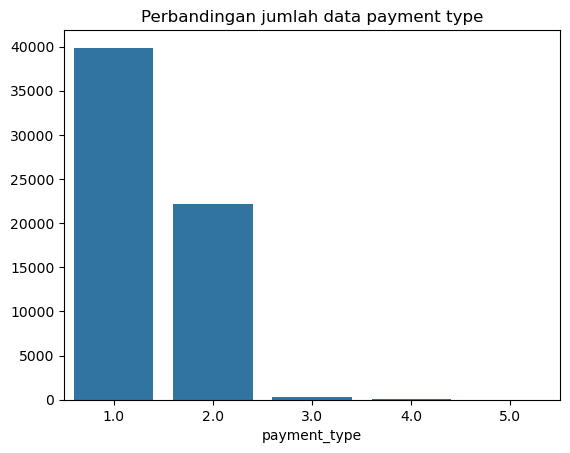

In [60]:
sns.barplot(x=df['payment_type'].value_counts().index,y=df['payment_type'].value_counts().values)
plt.title('Perbandingan jumlah data payment type')


Text(0.5, 1.0, 'Perbandingan jumlah data payment type dengan tip diatas 0')

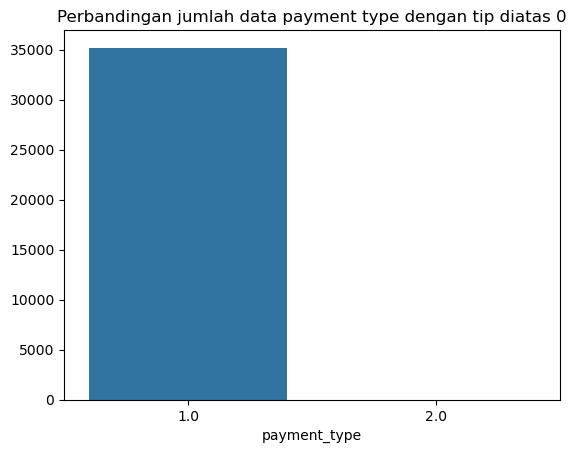

In [61]:
sns.barplot(x=df[df['tip_amount']>0]['payment_type'].value_counts().index,y=df[df['tip_amount']>0]['payment_type'].value_counts().values)
plt.title('Perbandingan jumlah data payment type dengan tip diatas 0')

In [62]:
df[df['tip_amount']>0].groupby('payment_type')[['tip_amount']].count()/df[df['tip_amount']>0].shape[0]*100

,tip_amount
payment_type,
1.0,90.215525
2.0,0.002563


bisa dilihat bahwa type payment yang paling cenderung memberikan tip adalah yang membayar menggunakan 1
oleh karena itu payment type dengan tip yang diatas 0 bisa difill dengan 1

sisanya akan diisi dengan 5 atau unknown

In [63]:
df.loc[(df['tip_amount'] > 0) & (df['payment_type'].isna()), 'payment_type'] = 1
df.loc[df['payment_type'].isna(),'payment_type']=5

In [64]:
df.isna().sum()

VendorID                  0  
lpep_pickup_datetime      0  
lpep_dropoff_datetime     0  
RatecodeID                0  
PULocationID              0  
DOLocationID              0  
passenger_count           0  
trip_distance             0  
fare_amount               0  
tip_amount                0  
tolls_amount              0  
total_amount              0  
payment_type              0  
trip_type                4314
congestion_surcharge     4304
status                    0  
deadheading               0  
time_on_road              0  
speed                    39  
expected_fare             0  
percent_tip              27  
dtype: int64

#### Trip tipe

jika dilihat dari data, hampir semua trip type 1 didominasi oleh ratecodeID1. sehingga bisa disimpulkan untuk mengisi Nan dari ratecode bisa diisi median yaitu 1.0


In [65]:
df.groupby(['RatecodeID','trip_type'])[['trip_type']].count()

trip_type
RatecodeID trip_type           
1.0        1.0        61097    
           2.0         6       
2.0        1.0        132      
3.0        1.0        21       
4.0        1.0        53       
           2.0         2       
5.0        1.0        117      
           2.0        993

In [66]:
df['trip_type'].median()

1.0

In [67]:
df['trip_type'].fillna(1,inplace=True)

#### **congestion_surcharge**

untuk mengisi nan, jika melihat mode yg paling banyak adalah taxi cab, jadi bisa menggunakan taxi cab untuk mengisi nan

2.5 / 0 = taxi cab 

2.75  = limousin/green cab

NaN = Unknown



Text(0.5, 1.0, 'Perbandingan jumlah data congestion_surcharge')

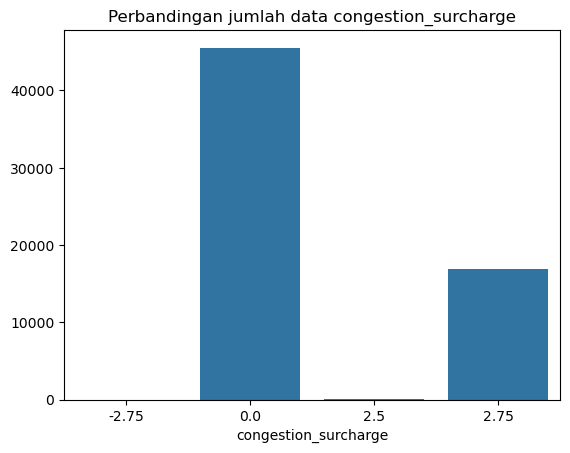

In [68]:
sns.barplot(x=df['congestion_surcharge'].value_counts().index,y=df['congestion_surcharge'].value_counts().values)
plt.title('Perbandingan jumlah data congestion_surcharge')

In [69]:
df['congestion_surcharge'] = np.where(df['congestion_surcharge']==0,'Taxi Cab',
                                np.where(df['congestion_surcharge']==0.5,'Taxi Cab',
                                       np.where(df['congestion_surcharge']==2.75,'Limousin/Green cab',
                                                np.where(df['congestion_surcharge']==-2.75,'Limousin/Green cab','Taxi Cab'))))

Text(0.5, 1.0, 'Perbandingan jumlah data congestion_surcharge')

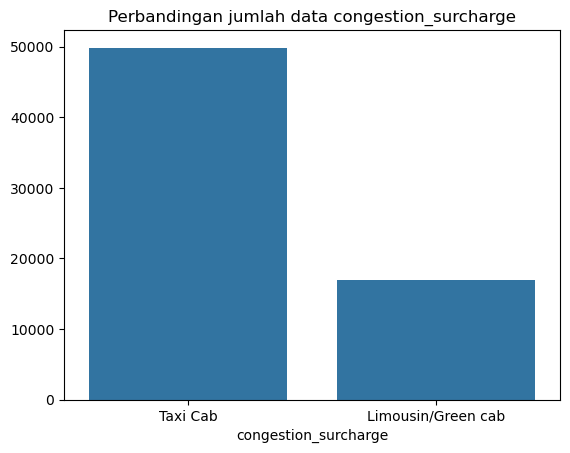

In [70]:
sns.barplot(x=df['congestion_surcharge'].value_counts().index,y=df['congestion_surcharge'].value_counts().values)
plt.title('Perbandingan jumlah data congestion_surcharge')

In [71]:
df.isna().sum()

VendorID                  0
lpep_pickup_datetime      0
lpep_dropoff_datetime     0
RatecodeID                0
PULocationID              0
DOLocationID              0
passenger_count           0
trip_distance             0
fare_amount               0
tip_amount                0
tolls_amount              0
total_amount              0
payment_type              0
trip_type                 0
congestion_surcharge      0
status                    0
deadheading               0
time_on_road              0
speed                    39
expected_fare             0
percent_tip              27
dtype: int64

#### Fare Amount fixing

mencari fare amount kecil tetapi waktu yang panjang dan jarak yang jauh

untuk mencari abnormal kita akan menambahkan kolom baru perhitungan kasar dari base fare dengan rumus

fare amount = 2.5 + 2.5/miles + 0.5 perminute

semua row dengan range error 10 dollar akan dianggap sebagai outlier

<Axes: ylabel='fare_amount'>

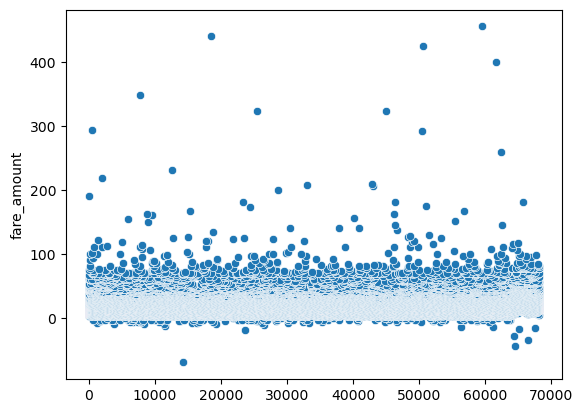

In [72]:
fare_amount = df.sort_values(by='fare_amount')['fare_amount']
sns.scatterplot(fare_amount)

In [73]:
x= df[((df['fare_amount']<0)|(df['total_amount']<0)|(df['tip_amount']<0))].index
print(f'Data yang difix sejumlah {len(x)}')
df.loc[x,'fare_amount'] = df.loc[x,'fare_amount'].abs()
df.loc[x,'total_amount'] = df.loc[x,'total_amount'].abs()
df.loc[x,'tip_amount'] = df.loc[x,'tip_amount'].abs()
df.loc[x,'percent_tip'] = df.loc[x,'percent_tip'].abs()

Data yang difix sejumlah 116


<Axes: ylabel='fare_amount'>

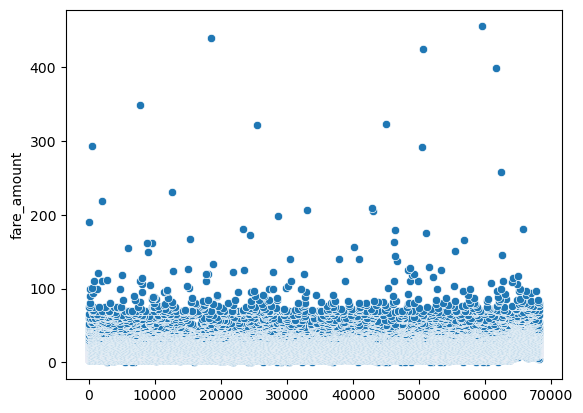

In [74]:
fare_amount = df.sort_values(by='fare_amount')['fare_amount']
sns.scatterplot(fare_amount)

<Axes: xlabel='fare_amount'>

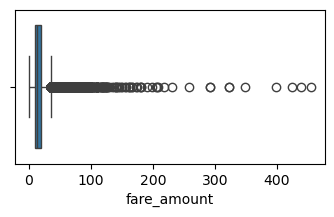

In [75]:
plt.figure(figsize=(4,2))
sns.boxplot(x=df['fare_amount'])

In [76]:
df[((df['fare_amount'] < (df['expected_fare'] - 10))) | (df['fare_amount'] > (df['expected_fare'] + 10))]


,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount,total_amount,payment_type,trip_type,congestion_surcharge,status,deadheading,time_on_road,speed,expected_fare,percent_tip
32,2,2023-01-01 00:40:58,2023-01-01 01:04:32,5.0,66,164,4.0,6.78,60.00,12.61,0.00,75.66,1.0,2.0,Limousin/Green cab,Abnormal,No,23.57,17.26,31.235,21.02
35,1,2023-01-01 00:41:53,2023-01-01 00:41:58,1.0,83,83,1.0,6.70,3.00,0.00,0.00,5.50,3.0,1.0,Taxi Cab,Abnormal,No,0.08,5025.00,19.290,0.00
43,2,2023-01-01 00:16:10,2023-01-01 00:54:55,5.0,66,48,3.0,6.19,75.00,0.00,0.00,78.05,2.0,2.0,Limousin/Green cab,Abnormal,No,38.75,9.58,37.350,0.00
49,2,2023-01-01 00:23:04,2023-01-01 23:18:32,1.0,255,48,1.0,8.55,47.80,5.30,0.00,58.35,1.0,1.0,Limousin/Green cab,Abnormal,No,1375.47,0.37,711.610,11.09
98,2,2023-01-01 00:57:51,2023-01-01 01:07:05,5.0,260,74,2.0,5.34,52.00,0.00,6.55,59.55,1.0,2.0,Taxi Cab,Abnormal,No,9.23,34.71,20.465,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68181,2,2023-01-31 17:59:00,2023-01-31 19:00:00,1.0,165,186,1.0,12.32,47.48,2.89,6.55,60.67,1.0,1.0,Taxi Cab,Abnormal,No,61.00,12.12,63.800,6.09
68184,2,2023-01-31 17:48:00,2023-01-31 17:53:00,1.0,193,193,1.0,3008.62,13.30,2.86,0.00,17.16,1.0,1.0,Taxi Cab,Abnormal,No,5.00,36103.44,7526.550,21.50
68187,2,2023-01-31 18:35:00,2023-01-31 19:08:00,1.0,3,74,1.0,13.90,36.09,0.00,0.00,37.09,5.0,1.0,Taxi Cab,Abnormal,No,33.00,25.27,53.750,0.00
68199,2,2023-01-31 19:17:00,2023-01-31 20:00:00,1.0,179,249,1.0,10.64,27.66,5.69,6.55,43.65,1.0,1.0,Taxi Cab,Abnormal,No,43.00,14.85,50.600,20.57


## **Cleaning Outlier**

### **time_on_road**

Max di jalan 10 jam / 600 menit

untuk perjalanan di bawah 4 menit juga bisa Abnormal, karena melihat kota New York yang cukup padat

Sehingga akan di drop

<Axes: xlabel='time_on_road'>

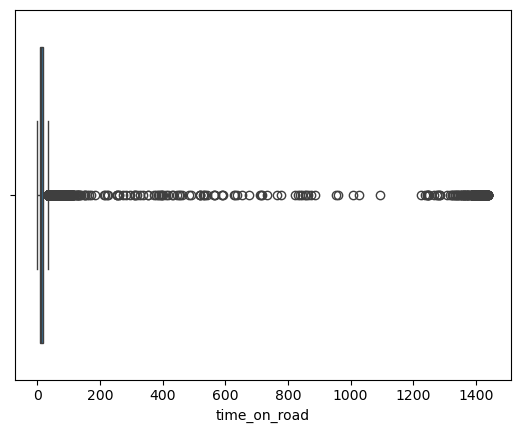

In [77]:
sns.boxplot(x=df['time_on_road'])

In [78]:
df.drop(df[(df['time_on_road']<4)|(df['time_on_road']>600)].index,inplace=True)

<Axes: xlabel='time_on_road'>

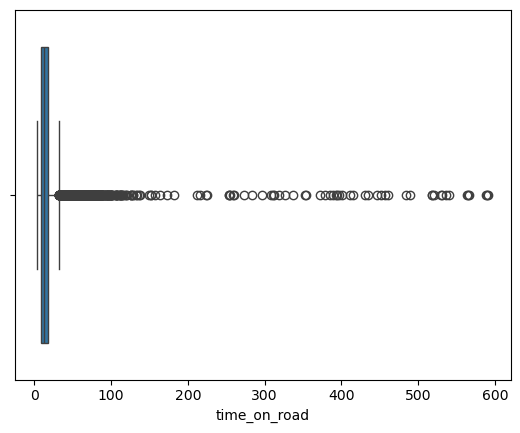

In [79]:
sns.boxplot(x=df['time_on_road'])

### **speed**

kecepatan maksimal dari taxi adalah 25 mph

Khusus untuk taxi yang menggunakan toll bisa max 45 mph

<Axes: xlabel='speed'>

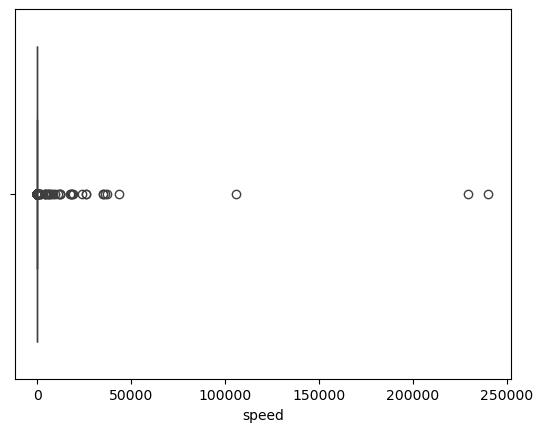

In [80]:
sns.boxplot(x=df['speed'])

In [81]:
a = df[((df['speed']>25)|(df['speed']==0))&(df['tolls_amount']==0)].index
b = df[((df['speed']>50))&(df['tolls_amount']>0)].index
df.drop(a.union(b),inplace=True)
print(f'Data yang diremove adalah {len(a.union(b))}')

Data yang diremove adalah 3181


<Axes: xlabel='speed'>

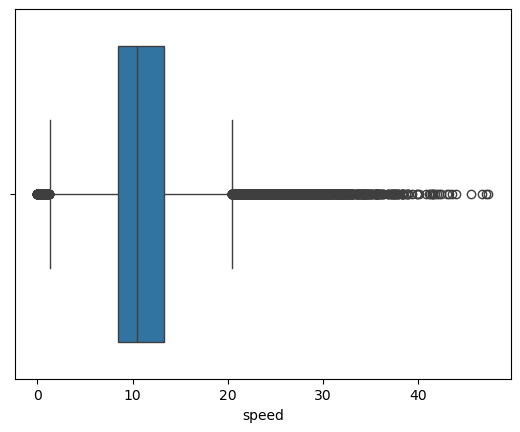

In [82]:
sns.boxplot(x=df['speed'])

### **PU dan DOLocationID**

Kita akan mencari lokasi PU dan DO yang berisi 264 dan meremove karena daerah itu NaN

In [83]:
a = df[(df['PULocationID']==264)|(df['DOLocationID']==264)].index
df.drop(a,inplace=True)
print(f'Data yang diremove adalah {len(a)}')

Data yang diremove adalah 56


### **fare_amount**

fare amount = 2.5 + 2.5/miles + 0.5 perminute

semua row dengan range error 10 dollar akan dianggap sebagai outlier

<Axes: xlabel='fare_amount'>

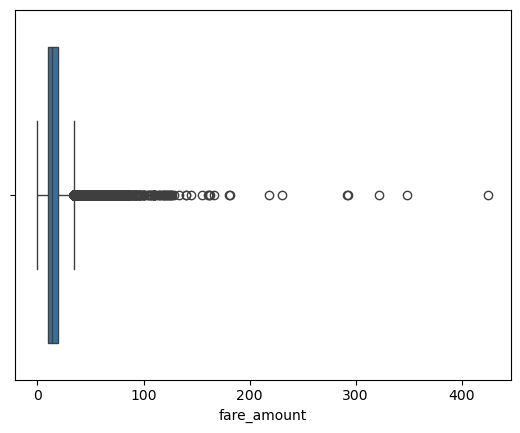

In [84]:
sns.boxplot(x=df['fare_amount'])

In [85]:
df[((df['fare_amount'] < (df['expected_fare'] - 10))) | (df['fare_amount'] > (df['expected_fare'] + 10))].sort_values(by='expected_fare')[['fare_amount','total_amount','expected_fare','tip_amount']]

,fare_amount,total_amount,expected_fare,tip_amount
64417,33.23,39.36,5.050,5.13
65122,50.26,52.22,5.100,0.96
65116,16.57,17.57,5.275,0.00
66459,35.01,29.15,5.450,4.86
4444,25.00,30.36,5.935,5.06
...,...,...,...,...
41566,10.70,12.20,301.565,0.00
1989,33.80,58.56,306.675,11.71
47559,45.00,46.00,324.175,0.00
7322,15.00,18.75,357.240,0.00


In [86]:
# Drop fare amount yang diluar range +-10 dari expected fare
a = df[((df['fare_amount'] < (df['expected_fare'] - 10))) | (df['fare_amount'] > (df['expected_fare'] + 10))].index
df.drop(a,inplace=True)
print(f'Data yang diremove adalah {len(a)}')

Data yang diremove adalah 621


### **trip_distance**

Bila melihat grafik sudah terlihat normal

<Axes: xlabel='trip_distance'>

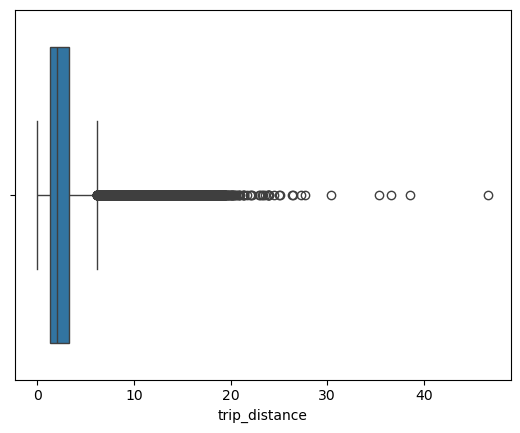

In [87]:
sns.boxplot(x=df['trip_distance'])

<Axes: xlabel='trip_distance', ylabel='Count'>

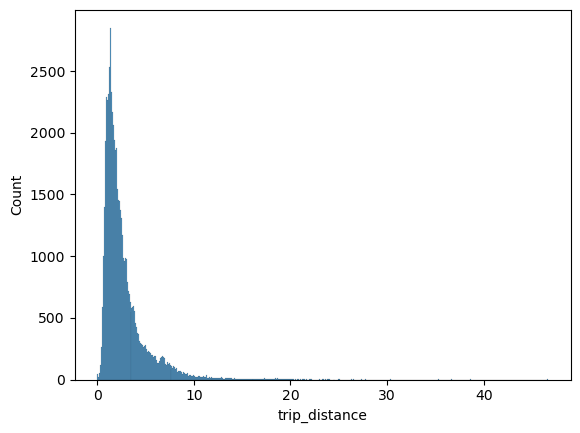

In [88]:
sns.histplot(x=df['trip_distance'])

### **tip_amount**

Tip dengan percent lebih dari 100 akan dianggap tidak wajar

<Axes: ylabel='percent_tip'>

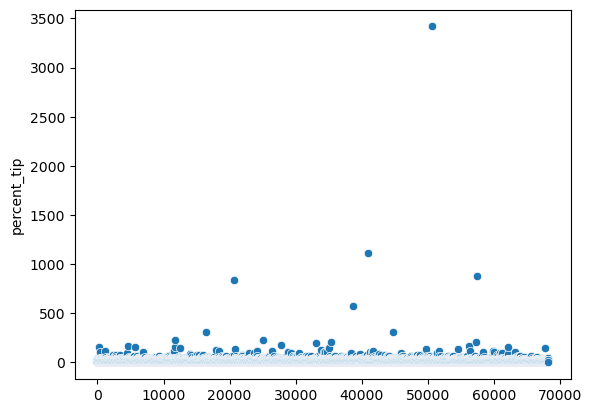

In [89]:
sns.scatterplot(df['percent_tip'])

In [90]:
a = df[df['percent_tip']>100].index
df.drop(a,inplace=True)
print(f'Data yang diremove adalah {len(a)}')

Data yang diremove adalah 49


<Axes: ylabel='percent_tip'>

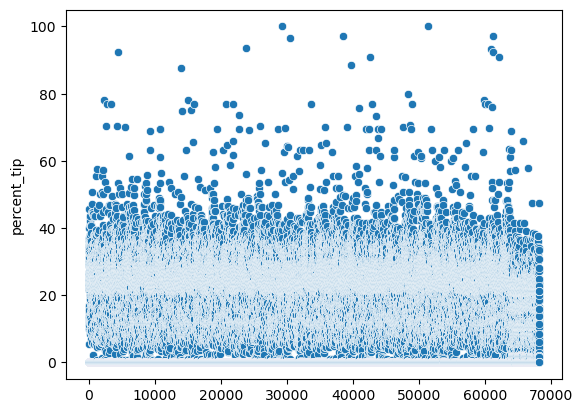

In [91]:
sns.scatterplot(df['percent_tip'])

### **Cleaning Label Tanggal**

Jika melihat data, kita bisa fokus untuk menganalisa data dari tanggal 1 - 31 Januari

Selain itu bisa dianggap outlier

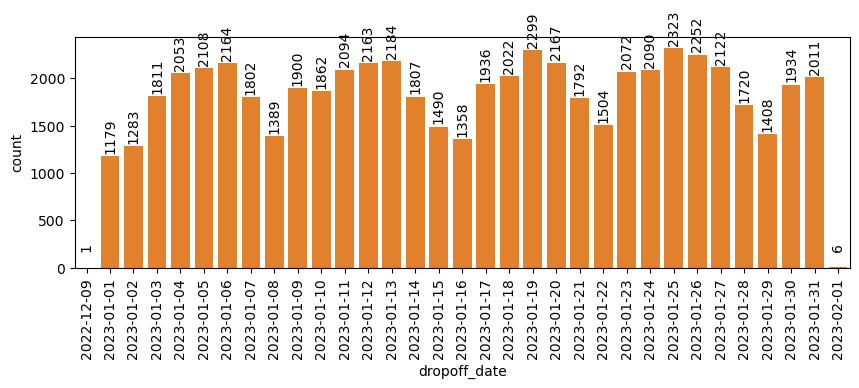

In [92]:
df['pickup_date'] = df['lpep_pickup_datetime'].dt.strftime(r'%m/%d/%Y').astype('datetime64[ns]')
df['dropoff_date'] = df['lpep_dropoff_datetime'].dt.strftime(r'%m/%d/%Y').astype('datetime64[ns]')
plt.figure(figsize=(10,3))
plots = sns.countplot(x=df['dropoff_date'].sort_values())
plt.xticks(rotation=90)

# add the annotation
for bar in plots.patches:
    
    plots.annotate(format(bar.get_height(), '.0f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()+100), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points',
                   rotation=90
                   )
sns.countplot(x=df['dropoff_date'].sort_values())
plt.show()

# Terdapat outlier di tanggal 2009, 2022 Des dan 2023 feb 01

In [93]:
df = df.drop(df.loc[df['dropoff_date'].isin(['2023-02-01', '2009-01-02', '2022-12-09'])].index)

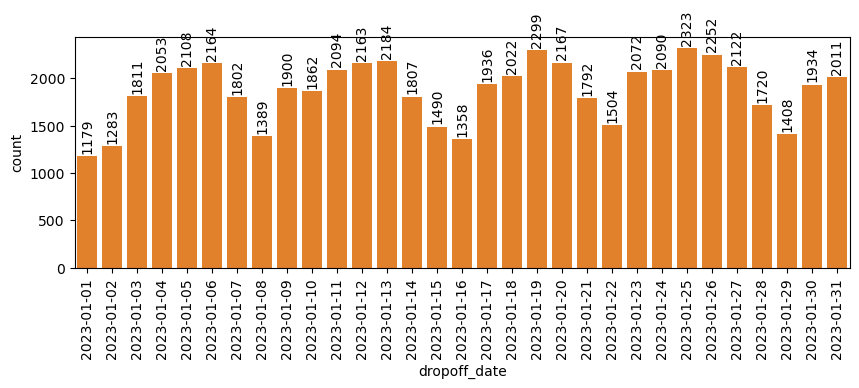

In [94]:
plt.figure(figsize=(10,3))
plots = sns.countplot(x=df['dropoff_date'].sort_values())
plt.xticks(rotation=90)

# add the annotation
for bar in plots.patches:
    
    plots.annotate(format(bar.get_height(), '.0f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()+100), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points',
                   rotation=90
                   )
sns.countplot(x=df['dropoff_date'].sort_values())
plt.show()

# Terdapat outlier di tanggal 2009, 2022 Des dan 2023 feb 01


<Axes: title={'center': 'Heatmap of NaN Values'}>

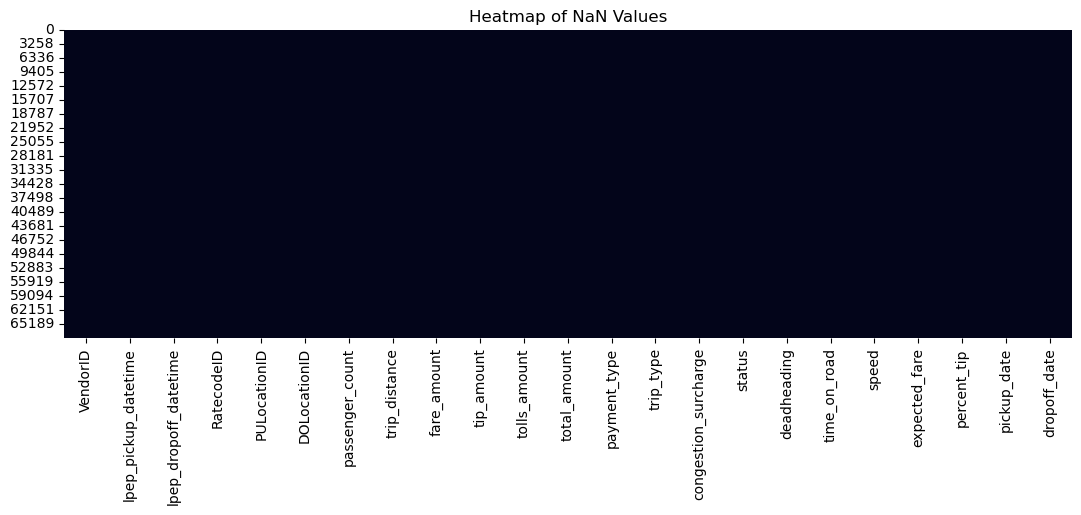

In [95]:
plt.figure(figsize=(13,4))
plt.title('Heatmap of NaN Values')
sns.heatmap(df.isna(),cbar=False)

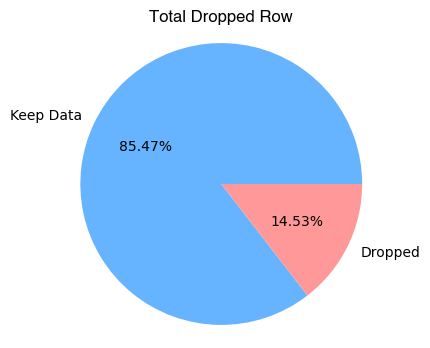

In [96]:
import matplotlib.pyplot as plt

# Values for the pie chart
values = [(58299/68211)*100, ((68211-58299)/68211)*100]

# Colors for the pie chart
colors = ['#66b3ff','#ff9999']

# Plotting the pie chart
plt.figure(figsize=(4, 4))
plt.pie(values,
        labels=['Keep Data', 'Dropped'],
        autopct='%.2f%%',
        colors=colors)

# Equal axis ensures the pie is drawn as a circle
plt.axis('equal')

# Title with specific font style
plt.title('Total Dropped Row', fontweight='bold', fontfamily='Helvetica')

# Display the chart
plt.show()


Setelah melakukan fill missing value dan cleaning, data yang di drop sekitar 14.5%

## **Decode Column and Reorder Column**

agar mempermudah analisa, saya akan mencoba untuk mengubah data dari kode menjadi text

In [97]:
df.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount,total_amount,payment_type,trip_type,congestion_surcharge,status,deadheading,time_on_road,speed,expected_fare,percent_tip,pickup_date,dropoff_date
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,1.0,166,143,1.0,2.58,14.9,4.03,0.0,24.18,1.0,1.0,Limousin/Green cab,Normal,No,11.02,14.05,14.460,27.05,2023-01-01,2023-01-01
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,1.0,24,43,1.0,1.81,10.7,2.64,0.0,15.84,1.0,1.0,Taxi Cab,Normal,No,6.77,16.04,10.410,24.67,2023-01-01,2023-01-01
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,1.0,41,238,1.0,1.30,6.5,1.70,0.0,10.20,1.0,1.0,Taxi Cab,Normal,No,5.82,13.40,8.660,26.15,2023-01-01,2023-01-01
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,1.0,41,74,1.0,1.10,6.0,0.00,0.0,8.00,1.0,1.0,Taxi Cab,Normal,No,5.97,11.06,8.235,0.00,2023-01-01,2023-01-01
5,2,2023-01-01 00:53:31,2023-01-01 01:11:04,1.0,41,262,1.0,2.78,17.7,0.00,0.0,22.95,2.0,1.0,Limousin/Green cab,Normal,No,17.55,9.50,18.225,0.00,2023-01-01,2023-01-01


In [98]:
df.rename(columns={'congestion_surcharge':'car_type'},inplace=True)

### Vendor

In [99]:
df['VendorID'] = np.where(df['VendorID']==1,'Creative Mobile Technologies','VeriFone')

### Ratecode

In [100]:
df['RatecodeID'] = np.where(df['RatecodeID']==1,'Standard rate',
                                np.where(df['RatecodeID']==2,'JFK',
                                       np.where(df['RatecodeID']==3,'Newark',
                                                np.where(df['RatecodeID']==4,'Nassau or Westchester',
                                                         np.where(df['RatecodeID']==5,'Negotiated fare','Group ride')))))

### Location

Berdasarkan domain knowledge dan research, untuk daerah dengan code 264 akan didrop karena daerah sebenarnya tidak ada dan untuk 265 akan tetap dipertahankan karena daerah ada diluar new york tapi tetap valid

In [101]:
#import df location
df_location = pd.read_csv('/Users/glen/Library/Mobile Documents/com~apple~CloudDocs/01.Capstone/2.New York City TLC Trip Record/Data/taxi_zone_lookup.csv')

In [102]:
df = pd.merge(df, df_location[['LocationID', 'Zone','service_zone']], left_on='PULocationID', right_on='LocationID', how='left')
df.drop(columns=['LocationID','PULocationID'],inplace=True)
df = df.rename(columns={'Zone': 'PULocationID'})

df = pd.merge(df, df_location[['LocationID', 'Zone']], left_on='DOLocationID', right_on='LocationID', how='left')
df.drop(columns=['LocationID','DOLocationID'],inplace=True)
df = df.rename(columns={'Zone': 'DOLocationID'})

### Payment
| **payment_type** | **Meaning** |
| --- | --- |
| 1 | Credit card |
| 2 | Cash |
| 3 | No charge |
| 4 | Dispute |
| 5 | Unknown | 
| 6 | Voided trip|

In [103]:
df['payment_type'] = np.where(df['payment_type']==1,'Credit Card',
                                np.where(df['payment_type']==2,'Cash',
                                       np.where(df['payment_type']==3,'No charge',
                                                np.where(df['payment_type']==4,'Dispute',
                                                         np.where(df['payment_type']==5,'Unknown','Voided trip')))))

### trip_type
| **payment_type** | **Meaning** |
| --- | --- |
| 1 | Street-hail |
| 2 | Dispatch |

In [104]:
df['trip_type'] = np.where(df['trip_type']==1,'Street-hail','Dispatch')
df

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount,total_amount,payment_type,trip_type,car_type,status,deadheading,time_on_road,speed,expected_fare,percent_tip,pickup_date,dropoff_date,PULocationID,service_zone,DOLocationID
0,VeriFone,2023-01-01 00:26:10,2023-01-01 00:37:11,Standard rate,1.0,2.58,14.90,4.03,0.0,24.18,Credit Card,Street-hail,Limousin/Green cab,Normal,No,11.02,14.05,14.460,27.05,2023-01-01,2023-01-01,Morningside Heights,Boro Zone,Lincoln Square West
1,VeriFone,2023-01-01 00:51:03,2023-01-01 00:57:49,Standard rate,1.0,1.81,10.70,2.64,0.0,15.84,Credit Card,Street-hail,Taxi Cab,Normal,No,6.77,16.04,10.410,24.67,2023-01-01,2023-01-01,Bloomingdale,Yellow Zone,Central Park
2,Creative Mobile Technologies,2023-01-01 00:13:14,2023-01-01 00:19:03,Standard rate,1.0,1.30,6.50,1.70,0.0,10.20,Credit Card,Street-hail,Taxi Cab,Normal,No,5.82,13.40,8.660,26.15,2023-01-01,2023-01-01,Central Harlem,Boro Zone,Upper West Side North
3,Creative Mobile Technologies,2023-01-01 00:33:04,2023-01-01 00:39:02,Standard rate,1.0,1.10,6.00,0.00,0.0,8.00,Credit Card,Street-hail,Taxi Cab,Normal,No,5.97,11.06,8.235,0.00,2023-01-01,2023-01-01,Central Harlem,Boro Zone,East Harlem North
4,VeriFone,2023-01-01 00:53:31,2023-01-01 01:11:04,Standard rate,1.0,2.78,17.70,0.00,0.0,22.95,Cash,Street-hail,Limousin/Green cab,Normal,No,17.55,9.50,18.225,0.00,2023-01-01,2023-01-01,Central Harlem,Boro Zone,Yorkville East
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58294,VeriFone,2023-01-31 20:33:00,2023-01-31 20:52:00,Standard rate,1.0,3.31,15.65,3.88,0.0,23.28,Credit Card,Street-hail,Taxi Cab,Abnormal,No,19.00,10.45,20.275,24.79,2023-01-31,2023-01-31,Morningside Heights,Boro Zone,Lenox Hill West
58295,VeriFone,2023-01-31 21:53:00,2023-01-31 22:05:00,Standard rate,1.0,2.26,14.62,3.31,0.0,21.68,Credit Card,Street-hail,Taxi Cab,Abnormal,No,12.00,11.30,14.150,22.64,2023-01-31,2023-01-31,Central Harlem North,Boro Zone,Upper East Side North
58296,VeriFone,2023-01-31 21:56:00,2023-01-31 22:14:00,Standard rate,1.0,3.92,20.72,1.25,0.0,25.02,Credit Card,Street-hail,Taxi Cab,Abnormal,No,18.00,13.07,21.300,6.03,2023-01-31,2023-01-31,East Harlem South,Boro Zone,Penn Station/Madison Sq West
58297,VeriFone,2023-01-31 22:40:00,2023-01-31 22:48:00,Standard rate,1.0,2.14,4.41,0.00,0.0,5.41,Unknown,Street-hail,Taxi Cab,Abnormal,No,8.00,16.05,11.850,0.00,2023-01-31,2023-01-31,Baisley Park,Boro Zone,Saint Albans


In [105]:
len(df.columns)

24

### Reorder Column

In [106]:
df_clean = df[['VendorID','RatecodeID','pickup_date','lpep_pickup_datetime','dropoff_date','lpep_dropoff_datetime',
         'time_on_road','PULocationID','DOLocationID','passenger_count','trip_distance','fare_amount','tip_amount','total_amount','payment_type'
         ,'trip_type','car_type','service_zone','speed']]

In [107]:
len(df_clean.columns)

19

### Export

In [108]:
# df.to_excel('/Users/glen/Library/Mobile Documents/com~apple~CloudDocs/01.Capstone/2.New York City TLC Trip Record/Export Dataset/clean_data.xlsx')

# Analisis

## 1. Mempelajari preferensi dari customer taxi NYC selama 1 bulan

### a.Top 10 Total Pickup and Dropoff Order by Region

In [109]:
top10pu = df_clean.groupby('PULocationID')[['VendorID']].count().sort_values(by='VendorID',ascending=False).head(10)
top10do = df_clean.groupby('DOLocationID')[['VendorID']].count().sort_values(by='VendorID',ascending=False).head(10)

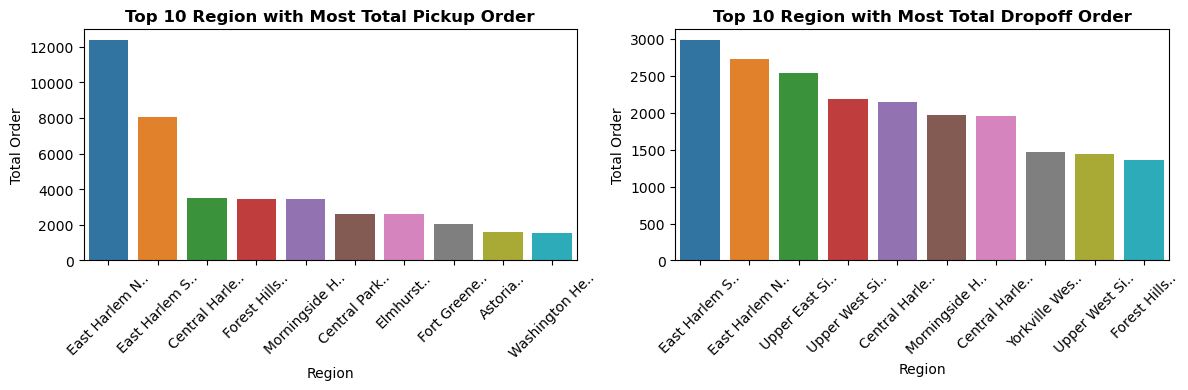

In [110]:
fig, ax = plt.subplots(1, 2, figsize=(14, 3))  # 1 row, 2 columns
sns.barplot(top10pu,x='PULocationID',y='VendorID',hue="PULocationID",ax=ax[0])
ax[0].set_title('Top 10 Region with Most Total Pickup Order', fontweight = "bold")
ax[0].set_ylabel('Total Order')
ax[0].set_xlabel('Region')
ax[0].tick_params(axis='x', rotation=45)
ax[0].set_xticklabels([label.get_text()[:13]+'..' for label in ax[0].get_xticklabels()])



sns.barplot(top10do,x='DOLocationID',y='VendorID',hue="DOLocationID",ax=ax[1])
ax[1].set_title('Top 10 Region with Most Total Dropoff Order', fontweight = "bold")
ax[1].set_ylabel('Total Order')
ax[1].set_xlabel('Region')
ax[1].tick_params(axis='x', rotation=45)
ax[1].set_xticklabels([label.get_text()[:13]+'..' for label in ax[1].get_xticklabels()])

plt.show()


Bila dilihat dari data, daerah yang paling banyak melakukan pickup order adalah di sekitar Harlem
Untuk dropoff lebih menyebar tapi cenderung lebih banyak yg di daerah Harlem

### b.Pickup Time 

| Time Slot | Hours | Description |
| --- | --- | --- |
| Early Morning	| 00:00 AM - 5:00 AM | Night shift drivers, airport trips
| Morning | 6:00 AM - 9:00 AM | Morning rush hour, commuting to work
| Midday | 10:00 AM - 3:00 PM | Off-peak, light to moderate activity
| Evening | 4:00 PM - 7:00 PM |Evening rush hour, commuting back home
| Night | 8:00 PM - 12:00 AM | Late-night social, events, or airport

In [111]:
df_clean['PU_hour'] = df_clean['lpep_pickup_datetime'].dt.hour
df_clean['DO_hour'] = df_clean['lpep_dropoff_datetime'].dt.hour

#### Top 5 Pickup Order by Time

In [112]:
df_clean['PU_hour'] = np.where((0<=df_clean['PU_hour']) & (df_clean['PU_hour']<=5),'Early Morning',
         np.where((5<df_clean['PU_hour']) & (df_clean['PU_hour']<=10),'Morning',
         np.where((10<df_clean['PU_hour']) & (df_clean['PU_hour']<=15),'Midday',
         np.where((15<df_clean['PU_hour']) & (df_clean['PU_hour']<=19),'Evening',
         np.where((19<df_clean['PU_hour']) & (df_clean['PU_hour']<=23),'Night',df_clean['PU_hour'])))))

In [113]:
x = df_clean.groupby(['PU_hour','PULocationID'])[['VendorID']].count()

top5eachhour = []
for i in df_clean['PU_hour'].unique():
    a = x.loc[i].sort_values('VendorID',ascending=False).head().rename(columns={'VendorID':'Total'})
    top5eachhour.append(a)
Early_Morning, Morning, Midday, Evening, Night = top5eachhour
print('''
                                            Top Pickup Region by Time of Day      

Early Morning              Morning                    Midday                       Evening                   Night
00:00 AM - 5:00 AM         6:00 AM - 9:00 AM          10:00 AM - 3:00 PM           4:00 PM - 7:00 PM         8:00 PM - 12:00 AM ''')
side_by_side(Early_Morning, Morning, Midday, Evening, Night)


                                            Top Pickup Region by Time of Day      

Early Morning              Morning                    Midday                       Evening                   Night
00:00 AM - 5:00 AM         6:00 AM - 9:00 AM          10:00 AM - 3:00 PM           4:00 PM - 7:00 PM         8:00 PM - 12:00 AM 


,Total
PULocationID,
Jackson Heights,292
Elmhurst,248
Forest Hills,240
East Harlem North,210
East Harlem South,159
,Total
PULocationID,
East Harlem North,4307
East Harlem South,1345


Insight :

Dilihat dari tabel, Top Pickup Region paling konsisten adalah East Harlem North dan East Harlem kecuali di jam 00-05 yang paling tinggi adalah Jackson Heights

Recommendation :

Memfokuskan armada Taxi di sekitar daerah East Harlem North dan South, kecuali di subuh bisa di sekitar Jackson Heights, Elmhurst, Forest Hills dan Eash Harlem juga

#### Top 5 Dropoff Order by Time

In [114]:
df_clean['DO_hour'] = np.where((0<=df_clean['DO_hour']) & (df_clean['DO_hour']<=5),'Early Morning',
         np.where((5<df_clean['DO_hour']) & (df_clean['DO_hour']<=10),'Morning',
         np.where((10<df_clean['DO_hour']) & (df_clean['DO_hour']<=15),'Midday',
         np.where((15<df_clean['DO_hour']) & (df_clean['DO_hour']<=19),'Evening',
         np.where((19<df_clean['DO_hour']) & (df_clean['DO_hour']<=23),'Night',df_clean['PU_hour'])))))

In [115]:
x = df_clean.groupby(['DO_hour','DOLocationID'])[['VendorID']].count()

top5eachhour = []
for i in df_clean['DO_hour'].unique():
    a = x.loc[i].sort_values('VendorID',ascending=False).head().rename(columns={'VendorID':'Total'})
    top5eachhour.append(a)
Early_Morning, Morning, Midday, Evening, Night = top5eachhour
print('''
                                            Top Dropoff Region by Time of Day      

Early Morning              Morning                    Midday                        Evening                       Night
00:00 AM - 5:00 AM         6:00 AM - 9:00 AM          10:00 AM - 3:00 PM            4:00 PM - 7:00 PM             8:00 PM - 12:00 AM ''')
side_by_side(Early_Morning, Morning, Midday, Evening, Night)


                                            Top Dropoff Region by Time of Day      

Early Morning              Morning                    Midday                        Evening                       Night
00:00 AM - 5:00 AM         6:00 AM - 9:00 AM          10:00 AM - 3:00 PM            4:00 PM - 7:00 PM             8:00 PM - 12:00 AM 


,Total
DOLocationID,
Jackson Heights,199
Elmhurst,122
Steinway,93
Forest Hills,87
Astoria,82
,Total
DOLocationID,
East Harlem South,1268
Upper East Side North,658


Insight :

Dilihat dari tabel, Top Dropoff Region di pagi hari adalah East Harlem South dan North

Recommendation :

Memfokuskan armada Taxi di sekitar daerah East Harlem North dan South, kecuali di subuh bisa di sekitar Jackson Heights, Elmhurst, Forest Hills dan Eash Harlem juga

### c.Total Order By Month

mencari tahu seberapa sering customer menggunakan Taxi selama satu bulan

In [116]:
group_by_date = df_clean.groupby('pickup_date')[['VendorID']].count()

<Axes: xlabel='pickup_date', ylabel='VendorID'>

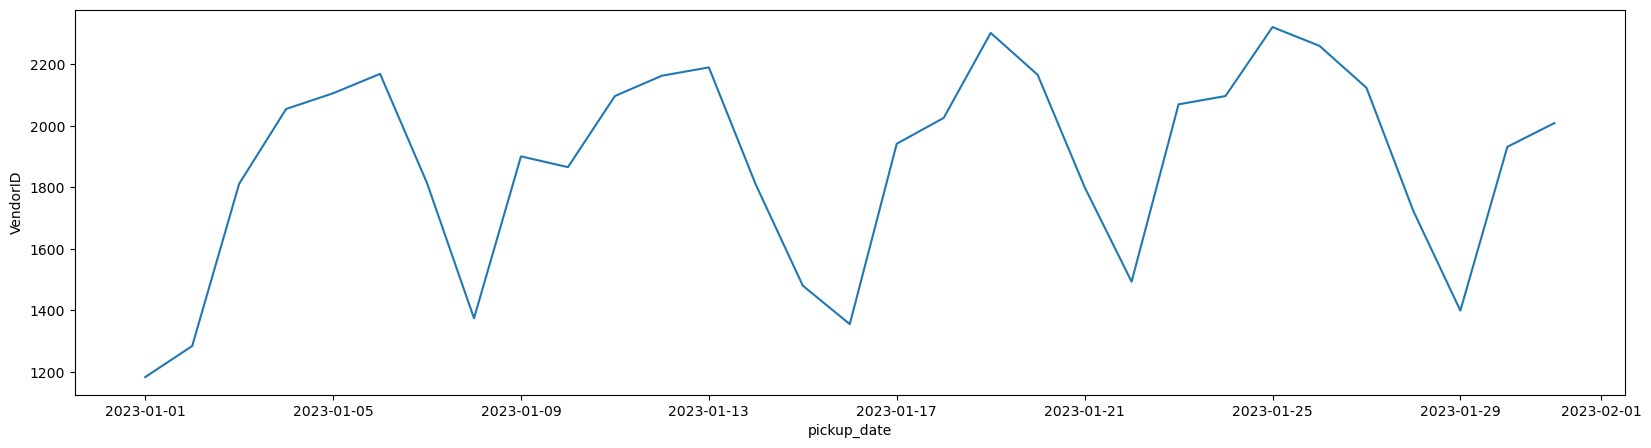

In [117]:
plt.figure(figsize=(20,5))

sns.lineplot(data=group_by_date,x='pickup_date',y='VendorID',ci=False)

Insight : Selalu ada penurunan di akhir minggu, dan selalu konsisten terjadinya penurunan order

di minggu ke 4 relatif lebih tinggi dibanding minggu minggu minggu sebelumnya

#### d.Total Order by Day Name

In [118]:
df_clean['pickup_day'] = df_clean['pickup_date'].apply(lambda x : x.day_name())
df_clean['dropoff_day'] = df_clean['dropoff_date'].apply(lambda x : x.day_name())
df_clean

,VendorID,RatecodeID,pickup_date,lpep_pickup_datetime,dropoff_date,lpep_dropoff_datetime,time_on_road,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,tip_amount,total_amount,payment_type,trip_type,car_type,service_zone,speed,PU_hour,DO_hour,pickup_day,dropoff_day
0,VeriFone,Standard rate,2023-01-01,2023-01-01 00:26:10,2023-01-01,2023-01-01 00:37:11,11.02,Morningside Heights,Lincoln Square West,1.0,2.58,14.90,4.03,24.18,Credit Card,Street-hail,Limousin/Green cab,Boro Zone,14.05,Early Morning,Early Morning,Sunday,Sunday
1,VeriFone,Standard rate,2023-01-01,2023-01-01 00:51:03,2023-01-01,2023-01-01 00:57:49,6.77,Bloomingdale,Central Park,1.0,1.81,10.70,2.64,15.84,Credit Card,Street-hail,Taxi Cab,Yellow Zone,16.04,Early Morning,Early Morning,Sunday,Sunday
2,Creative Mobile Technologies,Standard rate,2023-01-01,2023-01-01 00:13:14,2023-01-01,2023-01-01 00:19:03,5.82,Central Harlem,Upper West Side North,1.0,1.30,6.50,1.70,10.20,Credit Card,Street-hail,Taxi Cab,Boro Zone,13.40,Early Morning,Early Morning,Sunday,Sunday
3,Creative Mobile Technologies,Standard rate,2023-01-01,2023-01-01 00:33:04,2023-01-01,2023-01-01 00:39:02,5.97,Central Harlem,East Harlem North,1.0,1.10,6.00,0.00,8.00,Credit Card,Street-hail,Taxi Cab,Boro Zone,11.06,Early Morning,Early Morning,Sunday,Sunday
4,VeriFone,Standard rate,2023-01-01,2023-01-01 00:53:31,2023-01-01,2023-01-01 01:11:04,17.55,Central Harlem,Yorkville East,1.0,2.78,17.70,0.00,22.95,Cash,Street-hail,Limousin/Green cab,Boro Zone,9.50,Early Morning,Early Morning,Sunday,Sunday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58294,VeriFone,Standard rate,2023-01-31,2023-01-31 20:33:00,2023-01-31,2023-01-31 20:52:00,19.00,Morningside Heights,Lenox Hill West,1.0,3.31,15.65,3.88,23.28,Credit Card,Street-hail,Taxi Cab,Boro Zone,10.45,Night,Night,Tuesday,Tuesday
58295,VeriFone,Standard rate,2023-01-31,2023-01-31 21:53:00,2023-01-31,2023-01-31 22:05:00,12.00,Central Harlem North,Upper East Side North,1.0,2.26,14.62,3.31,21.68,Credit Card,Street-hail,Taxi Cab,Boro Zone,11.30,Night,Night,Tuesday,Tuesday
58296,VeriFone,Standard rate,2023-01-31,2023-01-31 21:56:00,2023-01-31,2023-01-31 22:14:00,18.00,East Harlem South,Penn Station/Madison Sq West,1.0,3.92,20.72,1.25,25.02,Credit Card,Street-hail,Taxi Cab,Boro Zone,13.07,Night,Night,Tuesday,Tuesday
58297,VeriFone,Standard rate,2023-01-31,2023-01-31 22:40:00,2023-01-31,2023-01-31 22:48:00,8.00,Baisley Park,Saint Albans,1.0,2.14,4.41,0.00,5.41,Unknown,Street-hail,Taxi Cab,Boro Zone,16.05,Night,Night,Tuesday,Tuesday


In [119]:
group_by_day = df_clean.groupby('pickup_day')[['VendorID']].count().sort_values(by='pickup_day').rename(columns={'VendorID':'Total Order'})
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
group_by_day = group_by_day.reindex(day_order)
group_by_day

,Total Order
pickup_day,
Monday,8539
Tuesday,9721
Wednesday,8495
Thursday,8827
Friday,8645
Saturday,7143
Sunday,6929


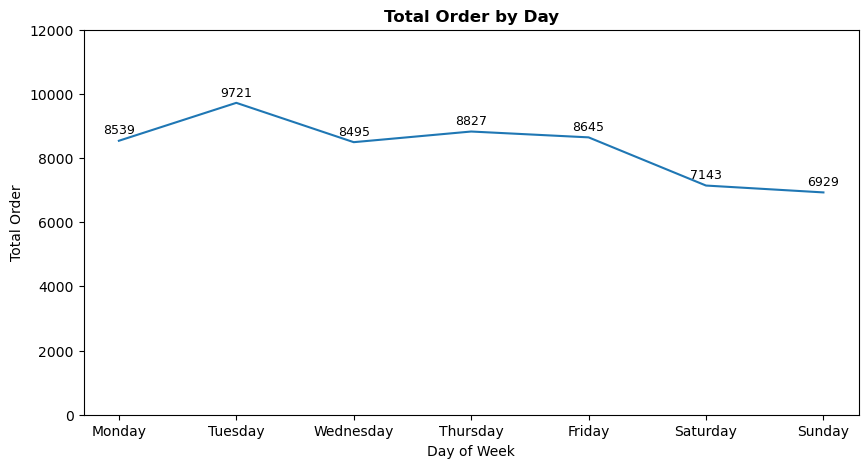

In [120]:
plt.figure(figsize=(10,5))
sns.lineplot(group_by_day,y='Total Order',x='pickup_day')
plt.title('Total Order by Day', fontweight='heavy')
plt.xlabel('Day of Week')
plt.ylabel('Total Order')
plt.ylim(0,12000)

for i in range(len(group_by_day)):
    plt.annotate(
        f"{group_by_day['Total Order'][i]}",  # Text to display
        (group_by_day.index[i], group_by_day['Total Order'][i]),  # (x, y) coordinates
        textcoords="offset points",  # Position the text relative to the point
        xytext=(0, 5),  # Offset by 5 points on the y-axis (adjust if needed)
        ha='center',  # Horizontal alignment (centered above the point)
        fontsize=9,   # Font size of annotation text
        color='black'  # Color of the text
    )

Insight :

Ada peningkatan signifikan di hari Senin dan meningkat paling tinggi di Selasa

untuk di hari Jumat hingga minggu sangat menurun, kemungkinan karena orang orang tidak dikejar waktu seperti di weekday, sehingga bisa menggunakan transportasi jenis lain

Terdapat perbedaan signifikan di weekday dengan weekend

What to do :

Focusing the taxi on week days especialy on Tuesday, alocating the week end to other day

### e. Trip Type Mostly used by Taxi Customer

In [121]:
trip_type_df = df_clean.groupby('trip_type')['VendorID'].count()
trip_type_df

trip_type
Dispatch       324  
Street-hail    57975
Name: VendorID, dtype: int64

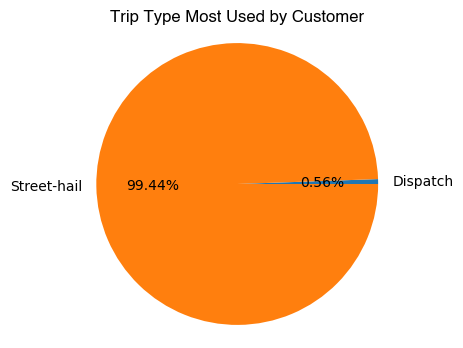

In [122]:
values = [(trip_type_df.loc['Dispatch']/len(df_clean))*100,(trip_type_df.loc['Street-hail']/len(df_clean))*100]
plt.figure(figsize=(4,4))
plt.pie(values,
        labels=['Dispatch','Street-hail'],
        autopct = '%.2f%%')
plt.axis('equal')
plt.title('Trip Type Most Used by Customer',fontweight='bold',fontfamily='Helvetica')
plt.show()

Insight:

Bisa dilihat customer paling banyak menggunakan street hail, yaitu memanggil di jalan langsung

Rekomendasi :

Memaksimalkan peredaran taxi di daerah - daerah yang banyak penumpang, agar siap bila ada kenaikan order

### f. Passenger Count

mencari kebiasaan orang new york naik taxi berapa orang

In [123]:
passenger = df_clean.groupby('passenger_count')[['VendorID']].count().sort_values(by='VendorID',ascending=False).rename(columns={'VendorID':'Jumlah'}).rename_axis('Passenger Count')
passenger

,Jumlah
Passenger Count,
1.0,50220
2.0,4411
5.0,1587
6.0,947
3.0,813
4.0,320
7.0,1


<Axes: xlabel='Passenger Count', ylabel='Jumlah'>

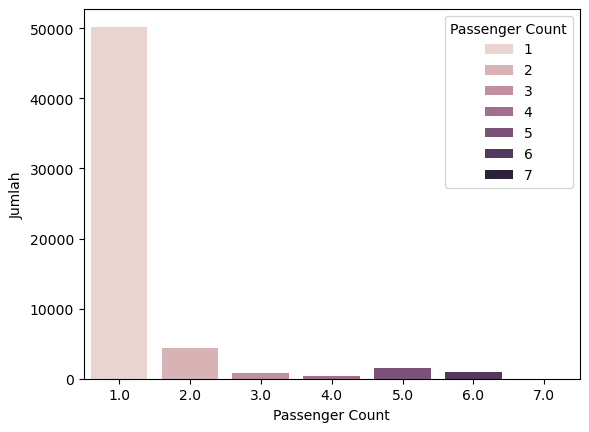

In [124]:
sns.barplot(data=passenger,x='Passenger Count',y='Jumlah',hue='Passenger Count')

In [125]:
df_clean.columns

Index(['VendorID', 'RatecodeID', 'pickup_date', 'lpep_pickup_datetime',
       'dropoff_date', 'lpep_dropoff_datetime', 'time_on_road', 'PULocationID',
       'DOLocationID', 'passenger_count', 'trip_distance', 'fare_amount',
       'tip_amount', 'total_amount', 'payment_type', 'trip_type', 'car_type',
       'service_zone', 'speed', 'PU_hour', 'DO_hour', 'pickup_day',
       'dropoff_day'],
      dtype='object')

In [126]:
df_clean.groupby(['PULocationID', 'passenger_count'])[['VendorID']].count().sort_values(by='VendorID',ascending=False).rename(columns={'VendorID': 'Total'}).head()

,,Total
PULocationID,passenger_count,
East Harlem North,1.0,10993
East Harlem South,1.0,6715
Central Harlem,1.0,3074
Forest Hills,1.0,3004
Morningside Heights,1.0,2941


Insight :

Jumlah orang yang paling banyak adalah 1 orang

Rekomendasi :

Memperbanyak armada yang ready, dan optimize penempatan taxi dengan daerah yang memang banyak menggunakan taxi

diantaranya East Harlem North, East Harlem South,Central Harlem	,Forest Hills, dan Morningside Heights

## 2. What most corelate most with tip

Kita akan mencari hal apa saja yang bisa mempengaruhi besarnya tip yang diberikan customer kepada taxi

Kita akan mengexclude data dengan tip 0 karena tidak relevan dengan apa yang ingin dicari

### a. tip vs time_on_road, passenger_count, fare_amount, tip_amount

<Axes: title={'center': 'Korelasi tip_amount dengan kolom lainnya'}>

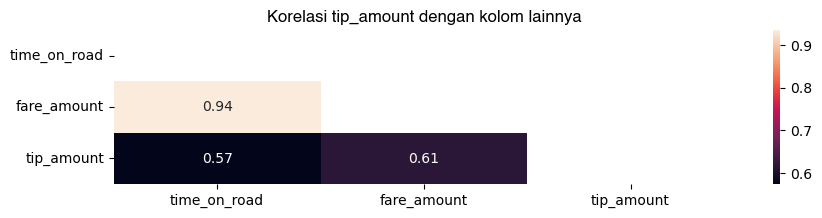

In [127]:
tablenew = df_clean[df_clean['tip_amount']>0][['time_on_road','fare_amount','tip_amount']].corr(method='spearman')
mask = np.triu(np.ones_like(tablenew.corr()))
plt.figure(figsize=(10,2))
plt.title('Korelasi tip_amount dengan kolom lainnya',fontweight='bold',fontfamily='Helvetica')
sns.heatmap(df_clean[df_clean['tip_amount']>0][['time_on_road','fare_amount','tip_amount']].corr(method='spearman'),annot=True,mask=mask)

In [128]:
# fare amount vs tip amount
a = 'fare_amount'
b = 'tip_amount'
correlation = df_clean[df_clean['tip_amount']>0][a].corr(df_clean[df_clean['tip_amount']>0][b],method='spearman')

# conclusion
print(f'''Korelasi {a} dengan {b}
''')
if correlation > 0:
    if 0 < correlation <= 0.2:
        print(f'''Correlation Score = {correlation}. very weak (tidak memiliki korelasi) | Direction : Positive''')
    elif 0.2 < correlation <= 0.4:
        print(f'''Correlation Score  = {correlation}. weak | Direction : Positive''')
    elif 0.4 < correlation <= 0.6:
        print(f'''Correlation Score  = {correlation}. moderate | Direction : Positive''')
    elif 0.6 < correlation <= 0.9:
        print(f'''Correlation Score  = {correlation}. strong | Direction : Positive''')
    elif correlation <= 1 :
        print(f'''Correlation Score  = {correlation}. very strong | Direction : Positive''')
else:
    if -0.2 <= correlation < 0:
        print(f'''Correlation Score = {correlation}. very weak (tidak memiliki korelasi) | Direction : Negative''')
    elif -0.4 <= correlation < -0.2:
        print(f'''Correlation Score  = {correlation}. weak | Direction : Negative''')
    elif -0.6 <= correlation <= -0.4:
        print(f'''Correlation Score  = {correlation}. moderate Direction : Negative''')
    elif -0.9 <= correlation <= 0.6:
        print(f'''Correlation Score  = {correlation}. strong | Direction : Negative''')
    elif correlation <= -1 :
        print(f'''Correlation Score  = {correlation}. very strong | Direction : Negative''')



Korelasi fare_amount dengan tip_amount

Correlation Score  = 0.6133481843881422. strong | Direction : Positive


In [129]:
# time on road vs tip amount
a = 'time_on_road'
b = 'tip_amount'
correlation = df_clean[df_clean['tip_amount']>0][a].corr(df_clean[df_clean['tip_amount']>0][b],method='spearman')

# conclusion
print(f'''Korelasi {a} dengan {b}
''')
if correlation > 0:
    if 0 < correlation <= 0.2:
        print(f'''Correlation Score = {correlation}. very weak (tidak memiliki korelasi) | Direction : Positive''')
    elif 0.2 < correlation <= 0.4:
        print(f'''Correlation Score  = {correlation}. weak | Direction : Positive''')
    elif 0.4 < correlation <= 0.6:
        print(f'''Correlation Score  = {correlation}. moderate | Direction : Positive''')
    elif 0.6 < correlation <= 0.9:
        print(f'''Correlation Score  = {correlation}. strong | Direction : Positive''')
    elif correlation <= 1 :
        print(f'''Correlation Score  = {correlation}. very strong | Direction : Positive''')
else:
    if -0.2 <= correlation < 0:
        print(f'''Correlation Score = {correlation}. very weak (tidak memiliki korelasi) | Direction : Negative''')
    elif -0.4 <= correlation < -0.2:
        print(f'''Correlation Score  = {correlation}. weak | Direction : Negative''')
    elif -0.6 <= correlation <= -0.4:
        print(f'''Correlation Score  = {correlation}. moderate Direction : Negative''')
    elif -0.9 <= correlation <= 0.6:
        print(f'''Correlation Score  = {correlation}. strong | Direction : Negative''')
    elif correlation <= -1 :
        print(f'''Correlation Score  = {correlation}. very strong | Direction : Negative''')



Korelasi time_on_road dengan tip_amount

Correlation Score  = 0.5735485925422634. moderate | Direction : Positive


Setelah melihat korelasi dari tip dengan kolom lain, kolom yang paling berkorelasi adalah Fare Amount dan yang kedua adalah time on road

Bisa diambil kesimpulan bahwa besar tip yang akan diberikan konsumer tergantung dari seberapa besar fare amount dan juga lama di jalan

### b. tip vs payment type

In [130]:
# import library untuk 2 sample t-Test
from scipy.stats import mannwhitneyu

# Fill Ho and Ha First
Ho = "Median tip Payment Credit Card = Median tip Payment Cash" # Ho typically no difference, no effect, no relationship
Ha = "Median tip Payment Credit Card  ≠ Median tip Payment Cash"

# Put Which function to use here
stat, pvaluemw = mannwhitneyu(
    df_clean[df_clean['tip_amount']>0][df_clean['payment_type']=='Credit Card']['tip_amount'],
    df_clean[df_clean['tip_amount']>0][df_clean['payment_type']=='Cash']['tip_amount']
)

pvaluemw

# alternative = 'two-sided' --> karena yang dibandingkan berupa two tail (2 arah)

#Conclusion
if pvaluemw >= 0.05:
    print(f'''
    pvalue = {pvaluemw}. pvalue >= 0.05. Fail to reject Ho. 
    Kita TIDAK punya cukup bukti bahwa rata - rata {Ha}
    (Rata-rata antara kedua data tidak terdapat perbedaan signinfikan)
    ''')
else:
    print(f'''
    pvalue = {pvaluemw}. pvalue < 0.05. Reject Ho. 
    Kita punya cukup bukti bahwa rata - rata {Ha}
    (Rata-rata antara kedua data terdapat perbedaan signinfikan)
    ''')


    pvalue = 0.284486652062915. pvalue >= 0.05. Fail to reject Ho. 
    Kita TIDAK punya cukup bukti bahwa rata - rata Median tip Payment Credit Card  ≠ Median tip Payment Cash
    (Rata-rata antara kedua data tidak terdapat perbedaan signinfikan)
    


### c. tip vs passenger

Apakah ada perbedaan median antar jumlah passenger dengan tip

untuk passenger_count 7 akan di exclude karena data hanya 1

In [131]:
# import library Anova - one Way
from scipy.stats import kruskal

# Fill Ho and Ha First
Ho = "Median tip dari jumlah passenger tidak ada perbedaan" # Ho typically no difference, no effect, no relationship
Ha = "Minimal ada 1 jumlah passenger yang Median tipnya berbeda."

# Put Which function to use here
stat, pvaluek = kruskal(
    df_clean[df_clean['passenger_count']==1]['tip_amount'],
    df_clean[df_clean['passenger_count']==2]['tip_amount'],
    df_clean[df_clean['passenger_count']==3]['tip_amount'],
    df_clean[df_clean['passenger_count']==4]['tip_amount'],
    df_clean[df_clean['passenger_count']==5]['tip_amount'],
    df_clean[df_clean['passenger_count']==6]['tip_amount']
)

pvaluek


# alternative = 'two-sided' --> karena yang dibandingkan berupa two tail (2 arah)

#Conclusion
if pvaluek >= 0.05:
    print(f'''
    pvalue = {pvaluek}. pvalue >= 0.05. Fail to reject Ho. 
    Kita TIDAK punya cukup bukti bahwa rata - rata {Ha}
    (Rata-rata antara semua data tidak berbeda signifikan)
    ''')
else:
    print(f'''
    pvalue = {pvaluek}. pvalue < 0.05. Reject Ho. 
    Kita punya cukup bukti bahwa {Ha}
    (Rata-rata antara semua data ada yang berbeda signifikan)
    ''')


    pvalue = 0.0009257759371483312. pvalue < 0.05. Reject Ho. 
    Kita punya cukup bukti bahwa Minimal ada 1 jumlah passenger yang Median tipnya berbeda.
    (Rata-rata antara semua data ada yang berbeda signifikan)
    


Text(0.5, 1.0, 'Perbandingan jumlah data payment type dengan tip diatas 0')

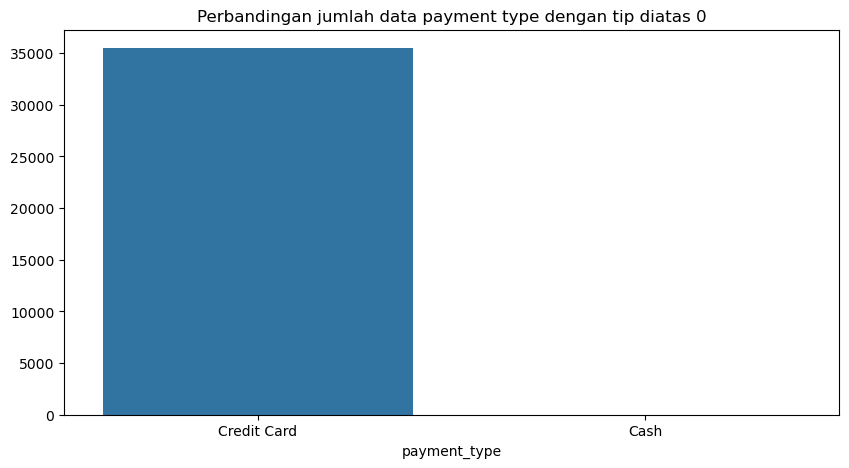

In [132]:
plt.figure(figsize=(10,5))
sns.barplot(x=df[df['tip_amount']>0]['payment_type'].value_counts().index,y=df[df['tip_amount']>0]['payment_type'].value_counts().values)
plt.title('Perbandingan jumlah data payment type dengan tip diatas 0')

### d. Preference Payment Type

Kita akan mencari payment type mana yang paling digunakan oleh kostumer

In [133]:
data_payment = df_clean.groupby('payment_type')[['VendorID']].count().rename(columns={'VendorID':'Jumlah Order'})

data_payment['Persentase'] = round(data_payment['Jumlah Order']/data_payment['Jumlah Order'].sum()*100)
data_payment.sort_values(by='Persentase',ascending=False)

,Jumlah Order,Persentase
payment_type,,
Credit Card,38539,66.0
Cash,19237,33.0
Unknown,382,1.0
Dispute,23,0.0
No charge,118,0.0


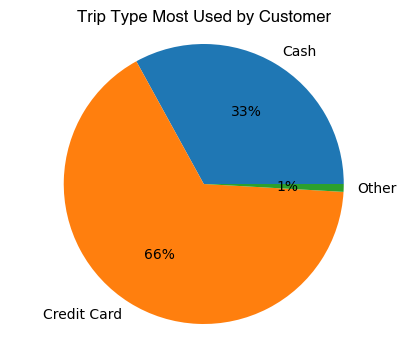

In [134]:
values = [(data_payment.loc['Cash'][0]/len(df_clean))*100,
          (data_payment.loc['Credit Card'][0])/len(df_clean)*100,
          (((data_payment.loc['Dispute'][0])+(data_payment.loc['No charge'][0])+(data_payment.loc['Unknown'][0]))/len(df_clean))*100,
          ]

labels = ['Cash', 'Credit Card', 'Other']

plt.figure(figsize=(5,4))
plt.pie(values,
        labels=labels,
        autopct = '%.0f%%')
plt.axis('equal')
plt.title('Trip Type Most Used by Customer',fontweight='bold',fontfamily='Helvetica')
plt.show()

### e.Top 10 Region with Median Tip

<Axes: xlabel='tip_amount', ylabel='Count'>

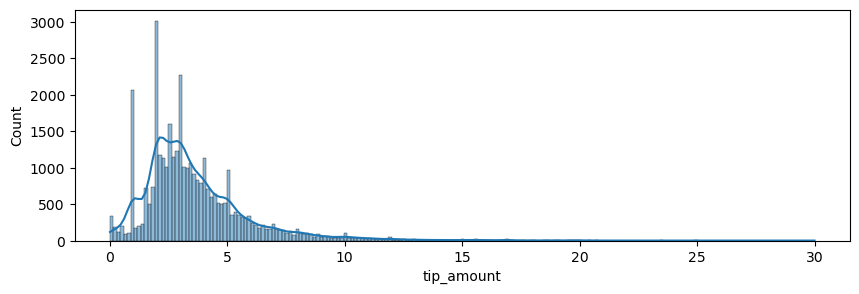

In [135]:
plt.figure(figsize=[10,3])
a = df_clean[df_clean['tip_amount']>0].groupby('PULocationID')[['tip_amount']].mean().sort_values(by='tip_amount',ascending=False)
sns.histplot(df_clean[df_clean['tip_amount']>0],x='tip_amount',kde=True)

Distribusi kolom tip tidak tersebar normal sehingga harus menggunakan median

In [136]:
kurtosis = df_clean['tip_amount'].kurtosis()

# conclusion
if kurtosis > 0:
    print(f'''Kurtosis = {kurtosis}. Merupakan Lepto kurtic''')
elif kurtosis == 0:
    print(f'''Kurtosis = {kurtosis}. Merupakan Meso Kurtic or Normal''')
elif kurtosis < 0:
    print(f'''Kurtosis = {kurtosis}. Merupakan Platy kurtic''')

Kurtosis = 5.990562338898285. Merupakan Lepto kurtic


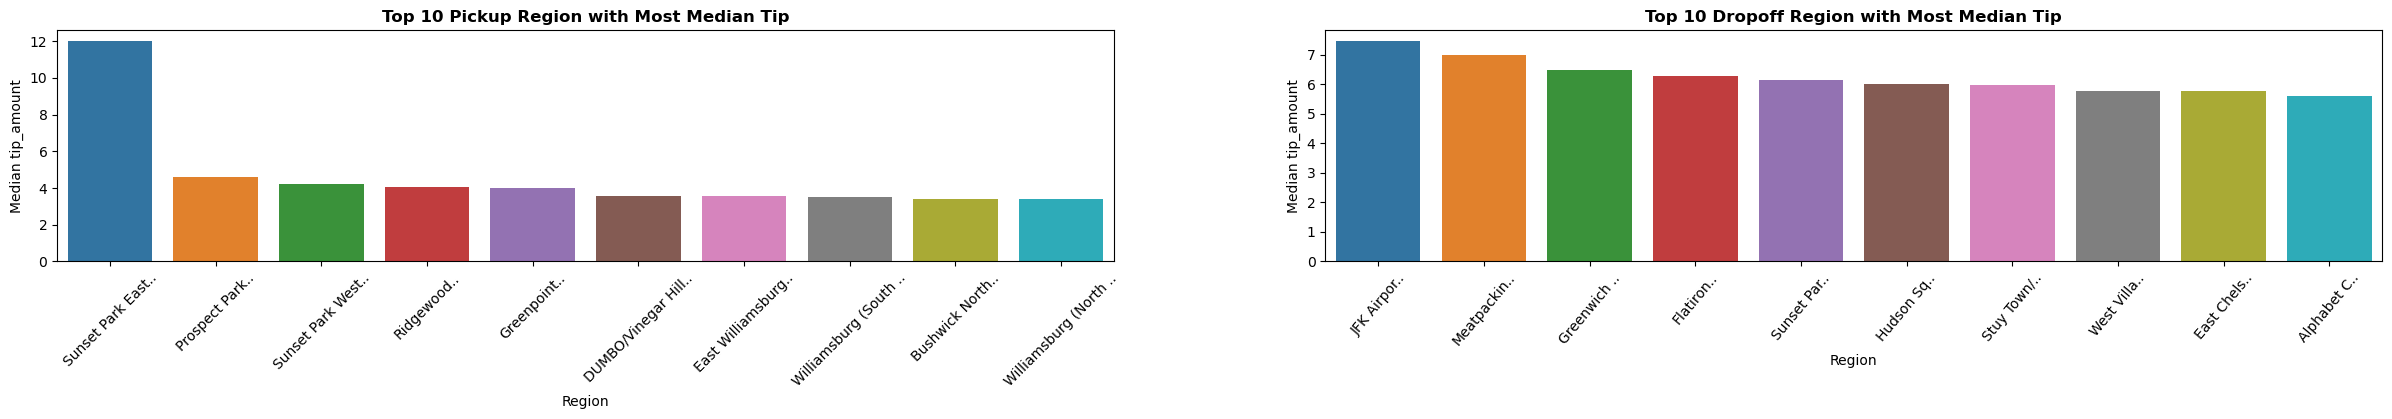

In [137]:
# kita akan melimit data dengan tip yang hanya 1 karena data tersebut tidak mempresentasikan daerah tersebut,
threshold = 10

all = df_clean.groupby('PULocationID')[['tip_amount']].agg(['count','median']).sort_values(('tip_amount', 'count'), ascending=False)
median_tip_per_daerahPU = all[all[('tip_amount', 'count')]>threshold].sort_values(('tip_amount', 'median'),ascending=False).head(10)

all = df_clean.groupby('DOLocationID')[['tip_amount']].agg(['count','median']).sort_values(('tip_amount', 'count'), ascending=False)
median_tip_per_daerahDO = all[all[('tip_amount', 'count')]>threshold].sort_values(('tip_amount', 'median'),ascending=False).head(10)

fig, ax = plt.subplots(1, 2, figsize=(30, 3))  # 1 row, 2 columns

sns.barplot(median_tip_per_daerahPU,x='PULocationID',y=('tip_amount', 'median'),ax=ax[0],hue="PULocationID")
ax[0].set_title('Top 10 Pickup Region with Most Median Tip', fontweight = "bold")
ax[0].set_ylabel('Median tip_amount')
ax[0].set_xlabel('Region')
ax[0].tick_params(axis='x', rotation=45)
ax[0].set_xticklabels([label.get_text()[:20]+'..' for label in ax[0].get_xticklabels()])


sns.barplot(median_tip_per_daerahDO,x='DOLocationID',y=('tip_amount', 'median'),ax=ax[1],hue="DOLocationID")
ax[1].set_title('Top 10 Dropoff Region with Most Median Tip', fontweight = "bold")
ax[1].set_ylabel('Median tip_amount')
ax[1].set_xlabel('Region')
ax[1].tick_params(axis='x', rotation=50)
ax[1].set_xticklabels([label.get_text()[:10]+'..' for label in ax[1].get_xticklabels()])

plt.show()

In [138]:
from scipy.stats import kruskal
stat, pvaluek = kruskal(
    df_clean.loc[df_clean['DOLocationID']==median_tip_per_daerahDO.index[0]]['tip_amount'],
    df_clean.loc[df_clean['DOLocationID']==median_tip_per_daerahDO.index[1]]['tip_amount'],
    df_clean.loc[df_clean['DOLocationID']==median_tip_per_daerahDO.index[2]]['tip_amount'],
    df_clean.loc[df_clean['DOLocationID']==median_tip_per_daerahDO.index[3]]['tip_amount'],
    df_clean.loc[df_clean['DOLocationID']==median_tip_per_daerahDO.index[4]]['tip_amount']
)
Ha = 'Terdapat perbedaan Median Tip Amount perdaerah pickup'

pvaluek

#Conclusion
if pvaluek >= 0.05:
    print(f'''
    pvalue = {pvaluek}. pvalue >= 0.05. Fail to reject Ho. 
    Kita TIDAK punya cukup bukti bahwa rata - rata {Ha}
    (Rata-rata antara semua data tidak berbeda signifikan)
    ''')
else:
    print(f'''
    pvalue = {pvaluek}. pvalue < 0.05. Reject Ho. 
    Kita punya cukup bukti bahwa {Ha}
    (Rata-rata antara semua data ada yang berbeda signifikan)
    ''')


    pvalue = 0.24316506484985578. pvalue >= 0.05. Fail to reject Ho. 
    Kita TIDAK punya cukup bukti bahwa rata - rata Terdapat perbedaan Median Tip Amount perdaerah pickup
    (Rata-rata antara semua data tidak berbeda signifikan)
    


In [139]:
side_by_side(median_tip_per_daerahPU,median_tip_per_daerahDO)

untuk daerah pickup dengan tip tertinggi ada di daerah Sunset Park East dengan median tip sebesar 12$

untuk daerah dropoff median tertinggi ada di JFK Airport tetapi perlu dilihat bahwa perbedaannya tidak terllau signifikan dengan top 10 nya

Insight :

Customer yang naik Taxi di daerah Sunset Park East cendeung memberikan tip yang lebih tinggi dibanding daerah lainnya

Dan untuk daerah dropoff tidak terlalu banyak perbedaan di median tip yang diberikan

## 3. Pendapatan rata - rata perhari

menghitung total amount perhari

### a. Total Pendapatan selama sebulan historical

<Axes: xlabel='total_amount', ylabel='Count'>

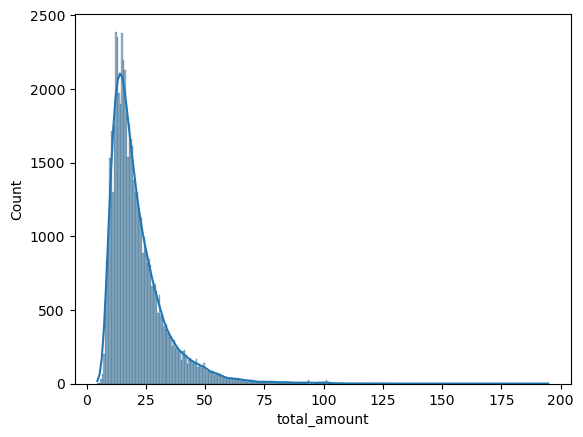

In [140]:
sns.histplot(df_clean['total_amount'],kde=True)

In [141]:
kurtosis = df_clean['total_amount'].kurtosis()

# conclusion
if kurtosis > 0:
    print(f'''Kurtosis = {kurtosis}. Merupakan Lepto kurtic''')
elif kurtosis == 0:
    print(f'''Kurtosis = {kurtosis}. Merupakan Meso Kurtic or Normal''')
elif kurtosis < 0:
    print(f'''Kurtosis = {kurtosis}. Merupakan Platy kurtic''')

Kurtosis = 10.143685999344388. Merupakan Lepto kurtic


Text(0, 0.5, 'Total Amount')

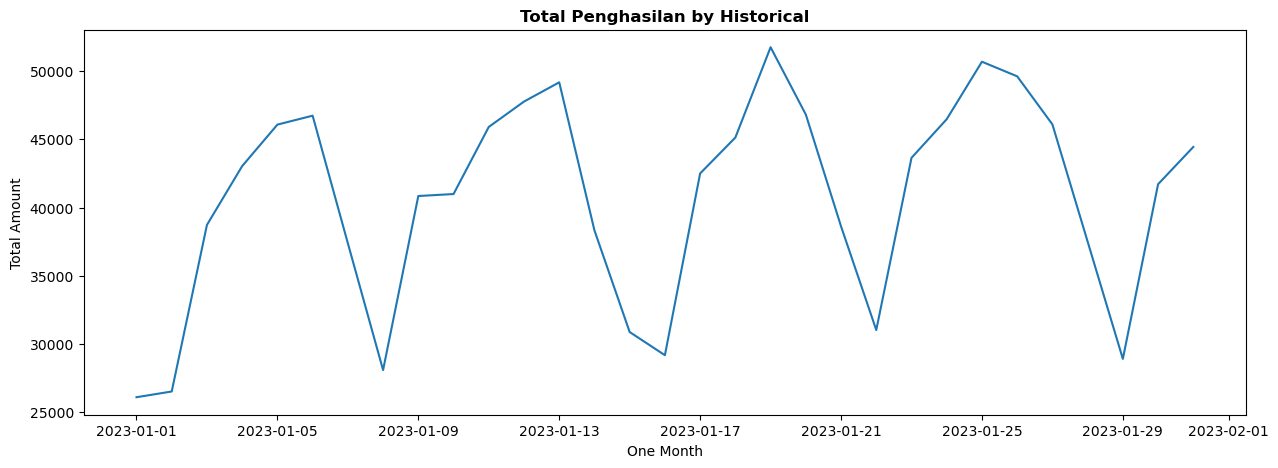

In [142]:
totalamount_by_date = df_clean.groupby('pickup_date')[['total_amount']].sum()
plt.figure(figsize=(15,5))
sns.lineplot(totalamount_by_date,x='pickup_date',y='total_amount')
plt.title('Total Penghasilan by Historical', fontweight='heavy')
plt.xlabel('One Month')
plt.ylabel('Total Amount')


In [143]:
totalamount_by_date['Day'] = [totalamount_by_date.index[i].strftime('%A') for i in range(len(totalamount_by_date))]
totalamount_by_date.sort_values(by='total_amount',ascending=False)

,total_amount,Day
pickup_date,,
2023-01-19,51745.21,Thursday
2023-01-25,50682.78,Wednesday
2023-01-26,49612.84,Thursday
2023-01-13,49173.03,Friday
2023-01-12,47762.25,Thursday
2023-01-20,46813.48,Friday
2023-01-06,46729.43,Friday
2023-01-24,46472.42,Tuesday
2023-01-27,46089.94,Friday


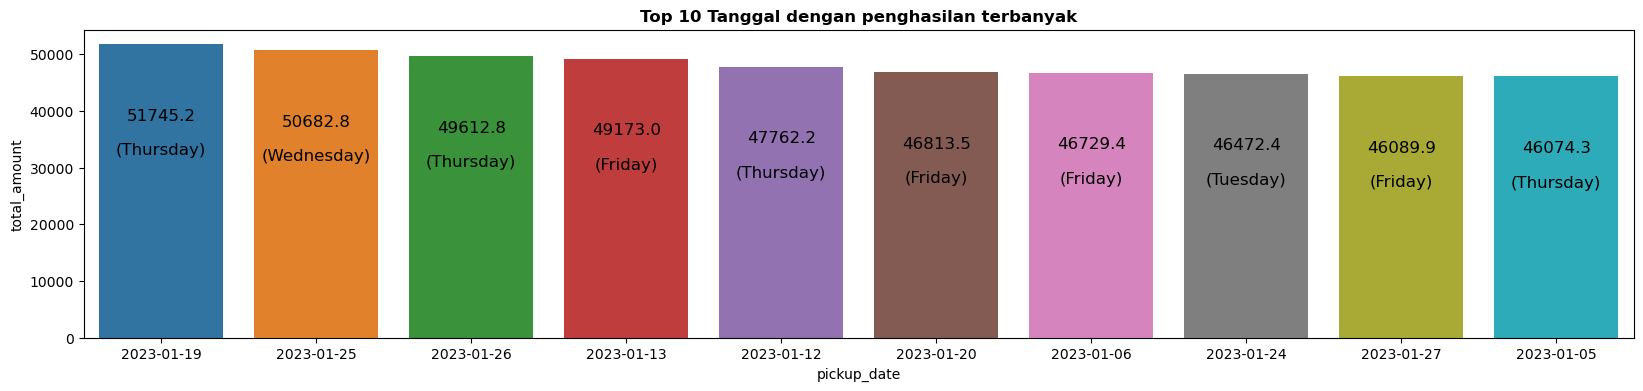

In [144]:
totalamount_by_date = totalamount_by_date.sort_values(by='total_amount',ascending=False).head(10)
plt.figure(figsize=(20,4))
plots = sns.barplot(totalamount_by_date,x='pickup_date',y='total_amount',hue='pickup_date')
plt.title('Top 10 Tanggal dengan penghasilan terbanyak', fontweight='heavy')

# add the annotation
for i in range(len(totalamount_by_date)):
    plots.text(i, totalamount_by_date['total_amount'][i] -20000, 
               f'''{ totalamount_by_date['total_amount'][i]:.1f}

({totalamount_by_date['Day'][i]})''', 
            ha='center', va='bottom', fontsize=12)

Insight :

Hari kamis tanggal 19 Januari merupakan hari paling banyak order taxi, setelah itu menyusul Wednesday, Trhusday dan Friday di tanggal berbeda - beda


Rekomendasi :

Fokus armada di hari kamis, karena memiliki jumlah penasukan tertinggi


# **Kesimpulan**

Dari analisis yang telah dilakukan kita bisa membuat kesimpulan :

1. Perforrma Vendor 1 yaitu Creative Mobile Technologies,LCC memiliki error rate hingga 26%, ini bisa mempengaruhi ketepatan data ketika kita ingin menghitung pendapatan tiap bulanya, oleh sebab itu disarankan untuk segera mereview kembali SLA dengan vendor

2. Preferensi kostumer Taxi NYC adalah :
melakukan pickup dan dropoff di sekitar daerah Harlem di jam Pagi dan sore
kustomer banyak melakukan order di hari weekday dan tertinggi di selasa dan selalu ada penurunan order di weekend
menggunakan trip type street hailing atau langsung panggil di jalan
paling banyak taxi order dengan 1 orang dan didaerah East Harlem North dan South

3. Faktor yang mempengaruhi tip
Daerah pickup sangat mempengaruhi jumlah tip yang diberikan yang merupakan tempat orang banyak berlibur juga

Untuk daerah dropoff hampir tidak ada perbedaan signifikan

Jumlah Fare amount dan Time on Road mempengeruhi juga jumlah tip yang diberikan

Jumlah passenger mempengaruhi jumlah tip yang diberikan

4. Total Pendapatan tertinggi dalam 1 bulan terdapat di hari Kamis tanggal 19 January dan diikuti oleh tanggal lainnya, tetapi mayoritas terdapat di hari kamis


**Rekomendasi**

1. Kembali mereview SLA dari tiap Vendor, akan lebih baik meminta pertanggung jawaban error pada data
2. Memfokuskan armada di wilayah pickup dan dropoff di sekitar Harlem di Pagi dan Sore
    * Melakukan fokus armada di weekday dibandingkan di weekend
    * Memperbanyak peredaran taxi karena banyak customer yang memilih untuk street hailing
3. Fokus pada peningkatan customer service di tiap daerah sehingga customer bisa menikmati perjalanan walaupun ditempuh cukup lama karena macet
    * Jumlah penumpang juga mempengaruhi jumlah tip yang diberikan
    * Lebih mengencourage pembayaran menggunakan Credit Card karena cenderung customer lebih memberikan tip ketika membayar menggunakan CC


Untuk melihat Dashboard bisa mengklik link berikut https://public.tableau.com/app/profile/glen.joy2546/viz/NYCTLCDashboard_17323385017260/DashboardUtama?publish=yes